IMPORTAÇÃO DE BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb
import datetime

In [ ]:
dados = pd.read_csv('clickbus_transformado.csv', sep = ',', decimal = '.', encoding = 'UTF-8')
dados

,id_compra,id_cliente,data_compra,origem_ida,destino_ida,origem_volta,destino_volta,tipo_viagem,viacao_ida,viacao_volta,valor_total_ticket,quantidade_passagens,ticket_medio,rota_completa
0,1,80278617,2018-12-26,Sao Paulo,Rio de Janeiro,Sem Retorno,Sem Retorno,Somente Ida,Viação Cometa,Sem Retorno,89.09,1,89.09,Sao Paulo para Rio de Janeiro
1,2,79684045,2018-12-05,Belo Horizonte,Curitiba,Sem Retorno,Sem Retorno,Somente Ida,Viação 1001,Sem Retorno,155.97,1,155.97,Belo Horizonte para Curitiba
2,3,69527117,2018-12-21,Brasilia,Salvador,Sem Retorno,Sem Retorno,Somente Ida,Expresso do Sul,Sem Retorno,121.99,1,121.99,Brasilia para Salvador
3,4,14632597,2018-12-06,Curitiba,Fortaleza,Sem Retorno,Sem Retorno,Somente Ida,Viação Águia Branca,Sem Retorno,55.22,1,55.22,Curitiba para Fortaleza
4,5,26608687,2021-02-23,Brasilia,Recife,Sem Retorno,Sem Retorno,Somente Ida,Viação Itapemirim,Sem Retorno,45.31,1,45.31,Brasilia para Recife
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741339,1741340,76212597,2023-12-29,Goiania,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viação Util,Sem Retorno,156.00,1,156.00,Goiania para Sao Paulo
1741340,1741341,33186490,2019-08-01,Brasilia,Ribeirao Preto,Sem Retorno,Sem Retorno,Somente Ida,Expresso do Sul,Sem Retorno,106.93,2,53.46,Brasilia para Ribeirao Preto
1741341,1741342,55018545,2019-01-18,Sao Paulo,Pocos de Caldas,Sem Retorno,Sem Retorno,Somente Ida,Expresso do Sul,Sem Retorno,92.77,1,92.77,Sao Paulo para Pocos de Caldas
1741342,1741343,76212597,2023-01-08,Goiania,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viação Kaissara,Sem Retorno,294.99,1,294.99,Goiania para Sao Paulo


** PARA UMA MELHOR ANALISE, NÓS IREMOS UTILIZAR DADOS APENAS DOS ULTIMOS 2 ANOS DADO O ÚLTIMO REGISTRO NO NOSSO DF

# CRIAÇÃO DO DF ULTIMOS 2 ANOS

In [ ]:
# criando uma nova tabela do registro dos ultimos 2 anos
dados['data_compra'] = pd.to_datetime(dados['data_compra'])

In [ ]:
# Calcular a data de dois anos atrás a partir da data mais recente no conjunto de dados
latest_date = dados['data_compra'].max()
two_years_ago = latest_date - pd.DateOffset(years=2)

In [ ]:
# Filtrando o DataFrame
df_ultimos_2_anos = dados[dados['data_compra'] >= two_years_ago]

In [ ]:
display(df_ultimos_2_anos)

,id_compra,id_cliente,data_compra,origem_ida,destino_ida,origem_volta,destino_volta,tipo_viagem,viacao_ida,viacao_volta,valor_total_ticket,quantidade_passagens,ticket_medio,rota_completa
10,11,94376474,2022-07-14,Campinas,Sao Jose dos Campos,Sem Retorno,Sem Retorno,Somente Ida,Viação Eucatur,Sem Retorno,55.46,1,55.46,Campinas para Sao Jose dos Campos
11,12,5362074,2022-07-05,Brasilia,Recife,Sem Retorno,Sem Retorno,Somente Ida,Viação Itapemirim,Sem Retorno,47.70,1,47.70,Brasilia para Recife
19,20,67348614,2022-07-30,Juiz de Fora,Juiz de Fora,Sem Retorno,Sem Retorno,Somente Ida,Viação Planalto,Sem Retorno,283.85,1,283.85,Juiz de Fora para Juiz de Fora
20,21,92615343,2022-07-29,Campos do Jordao,Uberlandia,Sem Retorno,Sem Retorno,Somente Ida,Viação Pássaro Marron,Sem Retorno,115.46,1,115.46,Campos do Jordao para Uberlandia
21,22,39414452,2024-03-28,Ribeirao Preto,Brasilia,Sem Retorno,Sem Retorno,Somente Ida,Viação Motta,Sem Retorno,64.65,1,64.65,Ribeirao Preto para Brasilia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741337,1741338,48293921,2023-04-21,Sao Paulo,Pocos de Caldas,Sem Retorno,Sem Retorno,Somente Ida,Viação Kaissara,Sem Retorno,135.23,1,135.23,Sao Paulo para Pocos de Caldas
1741338,1741339,61619767,2023-04-08,Goiania,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viacao Aguia Branca,Sem Retorno,183.92,1,183.92,Goiania para Sao Paulo
1741339,1741340,76212597,2023-12-29,Goiania,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viação Util,Sem Retorno,156.00,1,156.00,Goiania para Sao Paulo
1741342,1741343,76212597,2023-01-08,Goiania,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viação Kaissara,Sem Retorno,294.99,1,294.99,Goiania para Sao Paulo


# SEGMENTAÇÃO

# FREQUENCIA, GASTOS E PASSAGENS

In [ ]:
# FREQUENCIA DE COMPRAS POR CLIENTE
df_frequencia = df_ultimos_2_anos.groupby('id_cliente').size().reset_index(name='frequencia')
df_frequencia.sort_values(by='frequencia', ascending=False)

,id_cliente,frequencia
202362,75144664,917
246332,91427687,815
189725,70469330,657
108187,40244210,654
257251,95459735,515
...,...,...
129337,48042048,1
129335,48041468,1
129333,48041316,1
129329,48037851,1


In [ ]:
# VALOR GASTO POR CLIENTES
df_monetario = df_ultimos_2_anos.groupby('id_cliente')['valor_total_ticket'].sum().reset_index(name='valor_monetario')

In [ ]:
# FREQUENCIA DE COMPRA POR CLIENTE
df_segmentacao = pd.merge(df_frequencia, df_monetario, on='id_cliente')

In [ ]:
# QUANTIDADE DE PASSAGENS
df_quantidade_passagens = df_ultimos_2_anos.groupby('id_cliente')['quantidade_passagens'].sum().reset_index(name='total_passagens')

In [ ]:
# ORDENANDO PELA MAIOR QUANTIDADE DE FREQUENCIA NA df_segmentacao
df_segmentacao = df_segmentacao.sort_values(by='frequencia', ascending=False)
df_segmentacao

,id_cliente,frequencia,valor_monetario
202362,75144664,917,252652.40
246332,91427687,815,335774.61
189725,70469330,657,88747.95
108187,40244210,654,175059.42
257251,95459735,515,157635.11
...,...,...,...
129337,48042048,1,166.44
129335,48041468,1,78.94
129333,48041316,1,93.47
129329,48037851,1,223.99


In [ ]:
# AGRUPANDO FREQUENCIA, VALOR TOTAL GASTO E QUANTIDADE DE PASSAGENS
df_cruzando_ticket_com_frequencia = pd.merge(df_segmentacao, df_quantidade_passagens, on='id_cliente')

In [ ]:
# ORDENANDO PELA FREQUECNIA DA df_cruzando_ticket_com_frequencia
df_cruzando_ticket_com_frequencia = df_cruzando_ticket_com_frequencia.sort_values(by='frequencia', ascending=False)
df_cruzando_ticket_com_frequencia

,id_cliente,frequencia,valor_monetario,total_passagens
0,75144664,917,252652.40,2108
1,91427687,815,335774.61,1084
2,70469330,657,88747.95,808
3,40244210,654,175059.42,829
4,95459735,515,157635.11,669
...,...,...,...,...
269335,99989729,1,55.93,1
269336,99989086,1,68.66,1
269337,99988934,1,276.10,2
269322,18364,1,125.43,2


# FREQUENCIA DE COMPRA POR ID CLIENTE

In [ ]:
dados_sem_nan = df_ultimos_2_anos.dropna()

In [ ]:
dados_sem_nan_ultimos_2_anos = df_ultimos_2_anos.dropna()

In [ ]:
# FREQUENCIA DE COMPRAS POR CLIENTE
df_frequencia_ultimos_2_anos = df_ultimos_2_anos.groupby('id_cliente').size().reset_index(name='frequencia')
df_frequencia_ultimos_2_anos.sort_values(by='frequencia', ascending=False)

,id_cliente,frequencia
202362,75144664,917
246332,91427687,815
189725,70469330,657
108187,40244210,654
257251,95459735,515
...,...,...
129337,48042048,1
129335,48041468,1
129333,48041316,1
129329,48037851,1


# VIAÇÃO PREFERIDA POR CLIENTE / VIAÇÕES MAIS ESCOLHIDAS

In [ ]:
# DF PARA VERIFICAR VIAÇÃO PREFERIDA POR CADA 'id_cliente'
viacao_por_cliente = df_ultimos_2_anos.groupby('id_cliente')['viacao_ida'].apply(
    lambda x: x.mode()[0] if not x.empty else None
)

df_viacoes_preferidas = viacao_por_cliente.reset_index(name='viacao_preferida')

df_viacoes_preferidas

,id_cliente,viacao_preferida
0,1011,Viacao Aguia Branca
1,1118,Viacao Progresso
2,1697,Viação Guanabara
3,1732,Viação Andorinha
4,2293,Viacao Aguia Branca
...,...,...
269358,99996947,Viação Andorinha
269359,99997585,Viacao Progresso
269360,99998617,Expresso do Sul
269361,99998842,Viação Kaissara


In [ ]:
# DF PARA VERIFICAR AS 10 VIAÇÕES MAIS ESCOLHIDAS
viacoes_mais_escolhidas = df_ultimos_2_anos['viacao_ida'].value_counts().head(10)
viacoes_mais_escolhidas

,count
viacao_ida,
Viação Kaissara,80451
Viacao Garcia,53583
Viação Penha,39245
Expresso do Sul,37858
Viacao Passaro Marron,35931
Viacao Unida,33182
Viação Garcia,31329
Viação Catarinense,25193
Viacao Util,24967


# RECORRENTES/ESPORADICOS

* CRITÉRIO UTILIZADO PARA DIFERENCIAR RECORRENTE DE ESPORADICO:
- RECORRENTE: ID APAREDE MAIS DE 2 VEZES NA DF;
- ESPORADICO: ID APAREDE 1 OU MENOS NA DF.

In [ ]:
# LISTA COM CLIENTES RECORRENTES
ids_recorrentes_ultimos_2_anos = df_ultimos_2_anos['id_cliente'].value_counts()[dados_sem_nan['id_cliente'].value_counts() > 2].index

In [ ]:
# LISTA COM CLIENTES ESPORADICOS
ids_esporadicoss_ultimos_2_anos = df_ultimos_2_anos['id_cliente'].value_counts()[dados_sem_nan['id_cliente'].value_counts() == 1].index

In [ ]:
# CRIANDO DF - RECORRENTES
df_recorrentes_ultimos_2_anos = df_ultimos_2_anos[dados_sem_nan_ultimos_2_anos['id_cliente'].isin(ids_recorrentes_ultimos_2_anos)]
df_recorrentes_ultimos_2_anos.head(5)

,id_compra,id_cliente,data_compra,origem_ida,destino_ida,origem_volta,destino_volta,tipo_viagem,viacao_ida,viacao_volta,valor_total_ticket,quantidade_passagens,ticket_medio,rota_completa
10,11,94376474,2022-07-14,Campinas,Sao Jose dos Campos,Sem Retorno,Sem Retorno,Somente Ida,Viação Eucatur,Sem Retorno,55.46,1,55.46,Campinas para Sao Jose dos Campos
11,12,5362074,2022-07-05,Brasilia,Recife,Sem Retorno,Sem Retorno,Somente Ida,Viação Itapemirim,Sem Retorno,47.70,1,47.70,Brasilia para Recife
20,21,92615343,2022-07-29,Campos do Jordao,Uberlandia,Sem Retorno,Sem Retorno,Somente Ida,Viação Pássaro Marron,Sem Retorno,115.46,1,115.46,Campos do Jordao para Uberlandia
37,38,15062754,2023-01-20,Campinas,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viação Cometa,Sem Retorno,76.70,1,76.70,Campinas para Sao Paulo
42,43,15062754,2024-01-11,Campinas,Sao Paulo,Sem Retorno,Sem Retorno,Somente Ida,Viação Cometa,Sem Retorno,88.50,1,88.50,Campinas para Sao Paulo


In [ ]:
# CRIANDO DF - ESPORADICOS
df_esporadicos_ultimos_2_anos = df_ultimos_2_anos[dados_sem_nan_ultimos_2_anos['id_cliente'].isin(ids_esporadicoss_ultimos_2_anos)]
df_esporadicos_ultimos_2_anos.head(5)

,id_compra,id_cliente,data_compra,origem_ida,destino_ida,origem_volta,destino_volta,tipo_viagem,viacao_ida,viacao_volta,valor_total_ticket,quantidade_passagens,ticket_medio,rota_completa
19,20,67348614,2022-07-30,Juiz de Fora,Juiz de Fora,Sem Retorno,Sem Retorno,Somente Ida,Viação Planalto,Sem Retorno,283.85,1,283.85,Juiz de Fora para Juiz de Fora
21,22,39414452,2024-03-28,Ribeirao Preto,Brasilia,Sem Retorno,Sem Retorno,Somente Ida,Viação Motta,Sem Retorno,64.65,1,64.65,Ribeirao Preto para Brasilia
41,42,71825867,2024-01-01,Sao Jose dos Campos,Taubate,Sem Retorno,Sem Retorno,Somente Ida,Viação Sampaio,Sem Retorno,275.35,1,275.35,Sao Jose dos Campos para Taubate
53,54,8500326,2022-04-04,Juiz de Fora,Osasco,Sem Retorno,Sem Retorno,Somente Ida,Viação Eucatur,Sem Retorno,274.73,1,274.73,Juiz de Fora para Osasco
61,62,2517448,2023-01-12,Niteroi,Piracicaba,Sem Retorno,Sem Retorno,Somente Ida,Viacao Motta,Sem Retorno,31.76,1,31.76,Niteroi para Piracicaba


# ORIGEM/DESTINO -- ORIGENs e DESTINOs MAIS FREQUENTES

In [ ]:
rotas_mais_frequentes_ultimos_2_anos = df_ultimos_2_anos['rota_completa'].value_counts()

In [ ]:
rotas_mais_frequentes_ultimos_2_anos.head(10)

,count
rota_completa,
Sao Paulo para Brasilia,17774
Brasilia para Sao Paulo,16593
Sao Paulo para Goiania,12411
Goiania para Sao Paulo,11519
Sao Paulo para Curitiba,7799
Curitiba para Sao Paulo,7629
Brasilia para Recife,6839
Recife para Brasilia,6470
Sao Paulo para Pocos de Caldas,6260


In [ ]:
df_rotas_top_2_anos = pd.DataFrame(rotas_mais_frequentes_ultimos_2_anos).reset_index()
df_rotas_top_2_anos.columns = ['Rota', 'Contagem']

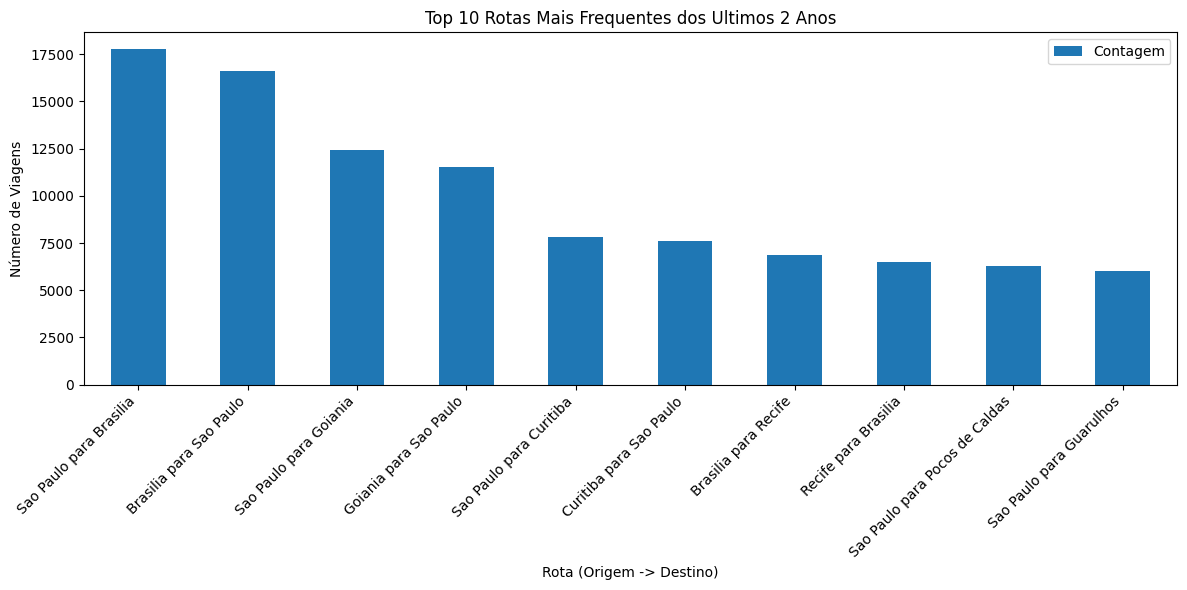

In [ ]:
df_rotas_top_2_anos.head(10).plot(kind='bar', x='Rota', y='Contagem', figsize=(12, 6))
plt.title('Top 10 Rotas Mais Frequentes dos Ultimos 2 Anos')
plt.xlabel('Rota (Origem -> Destino)')
plt.ylabel('Número de Viagens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Contar quantas vezes cada cidade de destino aparece
destinos_mais_procurados_ultimos_2_anos = df_ultimos_2_anos["destino_ida"].value_counts()

# Mostrar os top 10 destinos
print(destinos_mais_procurados_ultimos_2_anos.head(10))

destino_ida
Sao Paulo          105156
Brasilia            62959
Juiz de Fora        54569
Curitiba            41639
Goiania             41429
Divinopolis         29226
Rio de Janeiro      26511
Ouro Preto          23477
Campinas            21977
Pocos de Caldas     21123
Name: count, dtype: int64


/tmp/ipython-input-731278751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinos.values, y=top_destinos.index, palette="magma")


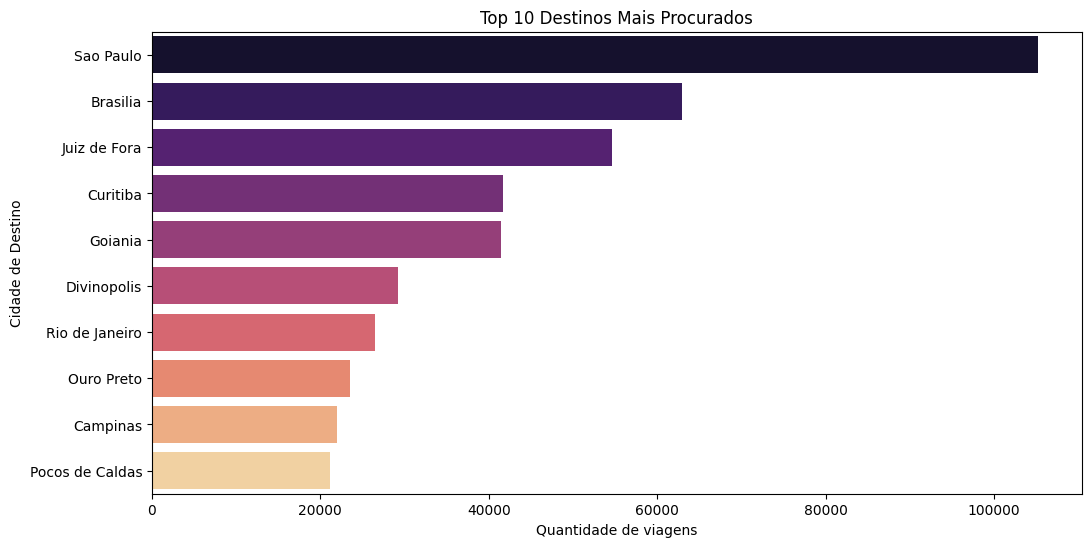

In [ ]:
top_destinos = destinos_mais_procurados_ultimos_2_anos.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_destinos.values, y=top_destinos.index, palette="magma")
plt.title("Top 10 Destinos Mais Procurados")
plt.xlabel("Quantidade de viagens")
plt.ylabel("Cidade de Destino")
plt.show()

Insight:

# CLIENTES VALIOSOS

In [ ]:
# ORDENANDO PELA FREQUECNIA DA df_cruzando_ticket_com_frequencia
df_cruzando_ticket_com_frequencia = df_cruzando_ticket_com_frequencia.sort_values(by='frequencia', ascending=False)
df_cruzando_ticket_com_frequencia

,id_cliente,frequencia,valor_monetario,total_passagens
0,75144664,917,252652.40,2108
1,91427687,815,335774.61,1084
2,70469330,657,88747.95,808
3,40244210,654,175059.42,829
4,95459735,515,157635.11,669
...,...,...,...,...
269359,48041468,1,78.94,1
269354,48045743,1,71.30,1
269315,23021,1,43.11,1
269290,32306,1,102.88,1


# DATAS MAIS FREQUENTES

In [ ]:
# Contar quantas vezes cada data aparece
frequencia_datas = df_ultimos_2_anos["data_compra"].value_counts().sort_values(ascending=False)
print(frequencia_datas.head(10))

data_compra
2023-12-28    2194
2023-12-21    2158
2024-01-02    2136
2023-12-27    2134
2024-01-01    2131
2023-12-26    2109
2023-12-29    2105
2022-12-26    2070
2023-12-25    2030
2023-12-20    2023
Name: count, dtype: int64


/tmp/ipython-input-2885601434.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_datas.index.astype(str), y=top_datas.values, palette="viridis")


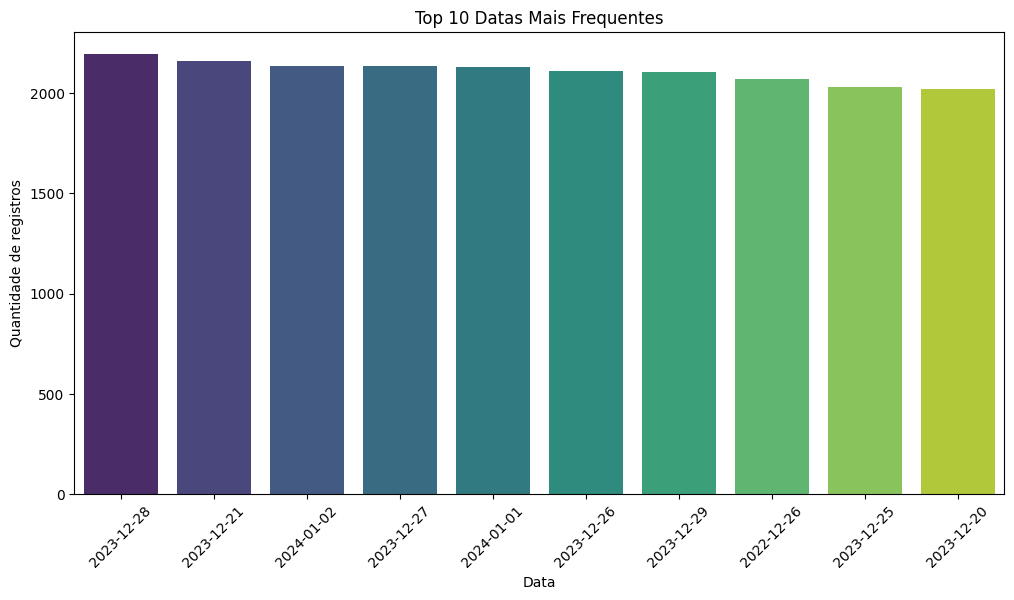

In [ ]:
top_datas = frequencia_datas.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_datas.index.astype(str), y=top_datas.values, palette="viridis")
plt.title("Top 10 Datas Mais Frequentes")
plt.xlabel("Data")
plt.ylabel("Quantidade de registros")
plt.xticks(rotation=45)
plt.show()

Insight: O gráfico ilustra um ápice de elevada demanda entre o final de dezembro e o começo de janeiro, sinalizando que o período festivo de final de ano é essencial para o empreendimento. Para aproveitar essa tendência, a organização deve antecipar-se no aumento da disponibilidade de assentos e horários. Esse período representa uma significativa oportunidade de vendas, permitindo à companhia implementar estratégias de precificação diferenciadas. O marketing deve ser orientado para campanhas que promovam a aquisição antecipada para as festividades. É imprescindível que a empresa reforce a qualidade do atendimento ao cliente, assegurando que a equipe esteja capacitada para o elevado volume de consultas. Em resumo, o êxito da empresa depende de um planejamento eficaz para a demanda de final de ano.

# TICKET MÉDIO

In [ ]:
# Calcular ticket médio
ticket_medio = df_ultimos_2_anos["ticket_medio"].mean()
print(f"Ticket médio: R$ {ticket_medio:.2f}")

Ticket médio: R$ 123.92


In [ ]:
#Ticket médio por destino
ticket_medio_destino = df_ultimos_2_anos.groupby("destino_ida")["ticket_medio"].mean().sort_values(ascending=False)
print(ticket_medio_destino.head(10))  # Top 10 cidades destino por ticket médio

destino_ida
Piracicaba        173.839451
Vitoria           156.948256
Vila Velha        148.690477
Divinopolis       147.068621
Brasilia          141.081560
Osasco            138.660412
Rio de Janeiro    138.193620
Uberaba           137.617381
Ouro Preto        135.780097
Goiania           134.190420
Name: ticket_medio, dtype: float64


/tmp/ipython-input-2292606503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_destino.values, y=ticket_destino.index, palette="coolwarm")


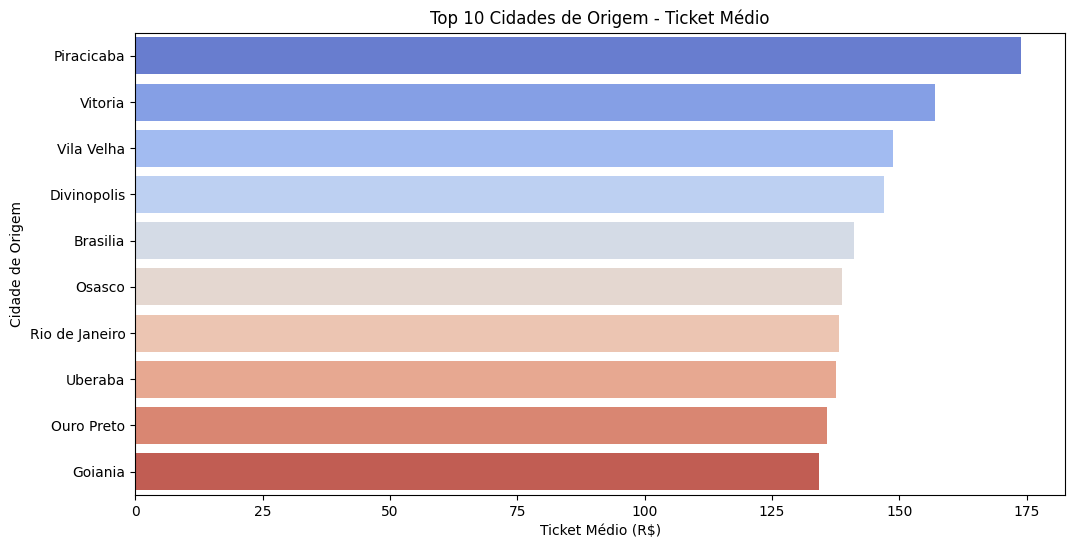

In [ ]:
ticket_destino = ticket_medio_destino.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ticket_destino.values, y=ticket_destino.index, palette="coolwarm")
plt.title("Top 10 Cidades de Origem - Ticket Médio")
plt.xlabel("Ticket Médio (R$)")
plt.ylabel("Cidade de Origem")
plt.show()

##Segmentação RFM (Recência, Frequência, Valor Monetário)

In [ ]:
# Definir a data de referência (snapshot date) para calcular a recência.
# Usaremos um dia após a última data de compra no dataset para garantir que ninguém tenha recência 0.
snapshot_date = df_ultimos_2_anos['data_compra'].max() + pd.DateOffset(days=1)
print(f"Data de referência para o cálculo de Recência: {snapshot_date.date()}")

Data de referência para o cálculo de Recência: 2024-04-02


In [ ]:
# Calcular os valores de RFM para cada cliente
rfm_df = df_ultimos_2_anos.groupby('id_cliente').agg({
    'data_compra': lambda date: (snapshot_date - date.max()).days,
    'id_compra': 'count',
    'valor_total_ticket': 'sum'
})


In [ ]:
# Renomear as colunas para maior clareza
rfm_df.rename(columns={'data_compra': 'Recencia',
                       'id_compra': 'Frequencia',
                       'valor_total_ticket': 'ValorMonetario'}, inplace=True)

print("\n--- Tabela RFM Calculada (Primeiras 5 linhas) ---")
display(rfm_df.head())


--- Tabela RFM Calculada (Primeiras 5 linhas) ---


,Recencia,Frequencia,ValorMonetario
id_cliente,,,
1011,714,1,137.65
1118,222,2,544.78
1697,339,4,1570.51
1732,51,4,767.00
2293,88,1,359.45


# --- PASSO 2: CRIAR OS SCORES RFM (DE 1 A 4) ---


In [ ]:
# --- PASSO 2: CRIAR OS SCORES RFM (DE 1 A 4) ---


r_labels = range(4, 0, -1)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recencia'], q=4, labels=r_labels, duplicates='drop')


f_labels = range(1, 5)
m_labels = range(1, 5)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequencia'].rank(method='first'), q=4, labels=f_labels, duplicates='drop')
rfm_df['M_Score'] = pd.qcut(rfm_df['ValorMonetario'], q=4, labels=m_labels, duplicates='drop')


rfm_df['R_Score'] = pd.to_numeric(rfm_df['R_Score'])
rfm_df['F_Score'] = pd.to_numeric(rfm_df['F_Score'])
rfm_df['M_Score'] = pd.to_numeric(rfm_df['M_Score'])


print("\n--- Tabela RFM com Scores Individuais (Primeiras 5 linhas) ---")
display(rfm_df.head())


--- Tabela RFM com Scores Individuais (Primeiras 5 linhas) ---


,Recencia,Frequencia,ValorMonetario,R_Score,F_Score,M_Score
id_cliente,,,,,,
1011,714,1,137.65,1,1,2
1118,222,2,544.78,3,3,4
1697,339,4,1570.51,2,4,4
1732,51,4,767.00,4,4,4
2293,88,1,359.45,4,1,3


# --- PASSO 3: CRIAR O SCORE RFM COMBINADO E SEGMENTAR ---

In [ ]:
# --- PASSO 3: CRIAR O SCORE RFM COMBINADO E SEGMENTAR ---

# Combinar os scores em uma única pontuação
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']


segment_map = {
    r'[3-4][3-4][3-4]': 'Campeões',
    r'[2-4][3-4][1-4]': 'Clientes Leais',
    r'[3-4][1-2][1-4]': 'Potencialmente Leais',
    r'[3-4][1-1][1-4]': 'Clientes Novos',
    r'[2-3][1-2][1-4]': 'Precisam de Atenção',
    r'1[2-4][1-4]': 'Clientes em Risco',
    r'11[1-4]': 'Hibernando'
}


rfm_df['Segmento'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['Segmento'] = rfm_df['Segmento'].replace(segment_map, regex=True)


print("\n--- Tabela RFM Final com Segmentação (Top 10 Clientes) ---")
display(rfm_df.sort_values(by='RFM_Score', ascending=False).head(10))


--- Tabela RFM Final com Segmentação (Top 10 Clientes) ---


,Recencia,Frequencia,ValorMonetario,R_Score,F_Score,M_Score,RFM_Score,Segmento
id_cliente,,,,,,,,
1732,51,4,767.00,4,4,4,12,Campeões
35646316,50,6,815.65,4,4,4,12,Campeões
35652228,3,10,1527.32,4,4,4,12,Campeões
35654284,94,6,1679.99,4,4,4,12,Campeões
35658049,27,3,736.92,4,4,4,12,Campeões
99978692,49,3,1147.18,4,4,4,12,Campeões
11677,91,4,760.24,4,4,4,12,Campeões
13419,51,23,2356.37,4,4,4,12,Campeões
99981620,95,3,1967.09,4,4,4,12,Campeões


# --- PASSO 4: VISUALIZAR A DISTRIBUIÇÃO DOS SEGMENTOS ---

/tmp/ipython-input-1560763315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


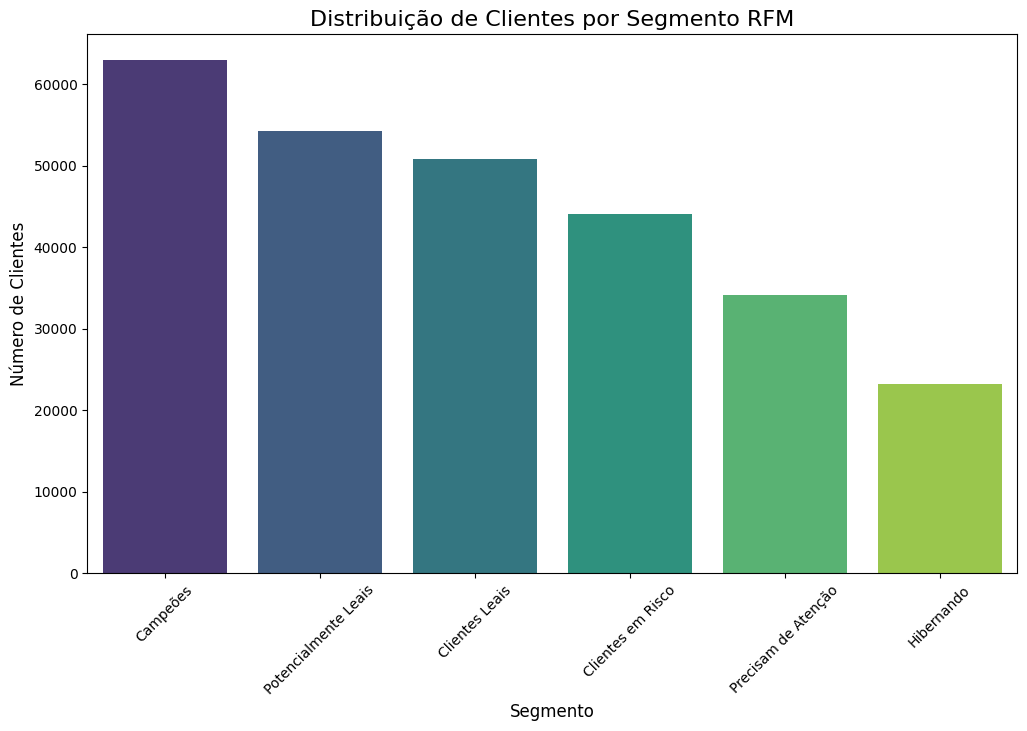

In [ ]:
segment_counts = rfm_df['Segmento'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribuição de Clientes por Segmento RFM', fontsize=16)
plt.xlabel('Segmento', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# *Insight Acionável a partir da Análise RFM*
A segmentação RFM nos permite identificar grupos de clientes com comportamentos distintos e, consequentemente, com diferentes probabilidades de realizar uma próxima compra.


Campeões (RFM alto): São seus melhores clientes. Compraram recentemente, compram com frequência e gastam muito. A probabilidade de recompra é altíssima. A estratégia aqui é de retenção e recompensa, com ofertas exclusivas e programas de fidelidade.

Clientes em Risco e Hibernando (RFM baixo): Eram bons clientes, mas não compram há muito tempo. A probabilidade de recompra é baixa sem uma ação de reativação. A estratégia é recuperá-los com campanhas de "sentimos sua falta", oferecendo descontos agressivos ou benefícios para trazê-los de volta.

Clientes Leais e Potencialmente Leais: São a base da sua receita. Compram com uma boa frequência, mas podem ter recência ou valor monetário menores que os campeões. O objetivo é aumentar o engajamento deles, transformando-os em Campeões através de cross-selling de rotas ou upselling de serviços.
Essa segmentação é a base para criar modelos preditivos de "próxima compra" muito mais assertivos, pois cada segmento terá um padrão de recompra diferente.

## Padrão de Recorrência de Compra.

# --- PASSO 1: CALCULAR O INTERVALO ENTRE COMPRAS PARA CADA CLIENTE ---

In [ ]:
# Garantir que os dados estão ordenados por cliente e data de compra
df_ordenado = df_ultimos_2_anos.sort_values(by=['id_cliente', 'data_compra'])

# Calcular a diferença em dias entre compras consecutivas para cada cliente
df_ordenado['diff_dias'] = df_ordenado.groupby('id_cliente')['data_compra'].diff().dt.days

print("--- DataFrame com a diferença de dias entre as compras (primeiras linhas com dados) ---")
# Vamos exibir apenas as linhas onde 'diff_dias' não é nulo para ver o cálculo
display(df_ordenado[df_ordenado['diff_dias'].notna()].head())

--- DataFrame com a diferença de dias entre as compras (primeiras linhas com dados) ---


,id_compra,id_cliente,data_compra,origem_ida,destino_ida,origem_volta,destino_volta,tipo_viagem,viacao_ida,viacao_volta,valor_total_ticket,quantidade_passagens,ticket_medio,rota_completa,diff_dias
425808,425809,1118,2023-08-24,Curitiba,Rio de Janeiro,Sem Retorno,Sem Retorno,Somente Ida,Viação Guanabara,Sem Retorno,377.58,1,377.58,Curitiba para Rio de Janeiro,230.0
960417,960418,1697,2023-04-05,Pouso Alegre,Curitiba,Sem Retorno,Sem Retorno,Somente Ida,Viação Guanabara,Sem Retorno,597.71,1,597.71,Pouso Alegre para Curitiba,15.0
648176,648177,1697,2023-04-25,Curitiba,Vila Velha,Sem Retorno,Sem Retorno,Somente Ida,Viação Guanabara,Sem Retorno,357.34,1,357.34,Curitiba para Vila Velha,20.0
956474,956475,1697,2023-04-29,Vila Velha,Curitiba,Sem Retorno,Sem Retorno,Somente Ida,Viação Guanabara,Sem Retorno,362.74,1,362.74,Vila Velha para Curitiba,4.0
359547,359548,1732,2022-11-07,Juiz de Fora,Juiz de Fora,Sem Retorno,Sem Retorno,Somente Ida,Viacao Garcia,Sem Retorno,188.80,1,188.80,Juiz de Fora para Juiz de Fora,4.0


# --- PASSO 2: AGREGAR OS DADOS DE INTERVALO POR CLIENTE ---

In [ ]:
# Calcular a média, mediana e desvio padrão do intervalo de dias para cada cliente
intervalo_compras = df_ordenado.groupby('id_cliente')['diff_dias'].agg(['mean', 'median', 'std']).reset_index()

intervalo_compras.rename(columns={'mean': 'media_intervalo',
                                  'median': 'mediana_intervalo',
                                  'std': 'desvio_padrao_intervalo'}, inplace=True)


intervalo_compras.fillna(0, inplace=True)

print("\n--- Tabela com o padrão de intervalo de compras por cliente (primeiras 5 linhas) ---")
display(intervalo_compras.head())


--- Tabela com o padrão de intervalo de compras por cliente (primeiras 5 linhas) ---


,id_cliente,media_intervalo,mediana_intervalo,desvio_padrao_intervalo
0,1011,0.0,0.0,0.000000
1,1118,230.0,230.0,0.000000
2,1697,13.0,15.0,8.185353
3,1732,155.0,90.0,191.940095
4,2293,0.0,0.0,0.000000


# --- PASSO 3: SEGMENTAR OS CLIENTES COM BASE NO INTERVALO MÉDIO ---

In [ ]:
# Definir os limites para cada segmento.
intervalo_compras = pd.merge(intervalo_compras, df_frequencia, on='id_cliente')

# Definir a função de segmentação
def segmentar_por_recorrencia(row):
    if row['frequencia'] == 1:
        return 'Compra Única'
    elif row['media_intervalo'] <= 15:
        return 'Viajante Frequente (Quinzenal)'
    elif row['media_intervalo'] <= 45:
        return 'Viajante Regular (Mensal)'
    elif row['media_intervalo'] <= 90:
        return 'Viajante Ocasional (Trimestral)'
    else:
        return 'Viajante Esporádico (Raro)'

intervalo_compras['Segmento_Recorrencia'] = intervalo_compras.apply(segmentar_por_recorrencia, axis=1)

print("\n--- Tabela final com a segmentação por recorrência ---")
display(intervalo_compras.head())



--- Tabela final com a segmentação por recorrência ---


,id_cliente,media_intervalo,mediana_intervalo,desvio_padrao_intervalo,frequencia,Segmento_Recorrencia
0,1011,0.0,0.0,0.000000,1,Compra Única
1,1118,230.0,230.0,0.000000,2,Viajante Esporádico (Raro)
2,1697,13.0,15.0,8.185353,4,Viajante Frequente (Quinzenal)
3,1732,155.0,90.0,191.940095,4,Viajante Esporádico (Raro)
4,2293,0.0,0.0,0.000000,1,Compra Única


# --- PASSO 4: VISUALIZAR A DISTRIBUIÇÃO DOS NOVOS SEGMENTOS ---

/tmp/ipython-input-16598573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento_recorrencia_counts.index, y=segmento_recorrencia_counts.values, palette='plasma', order=segmento_recorrencia_counts.index)


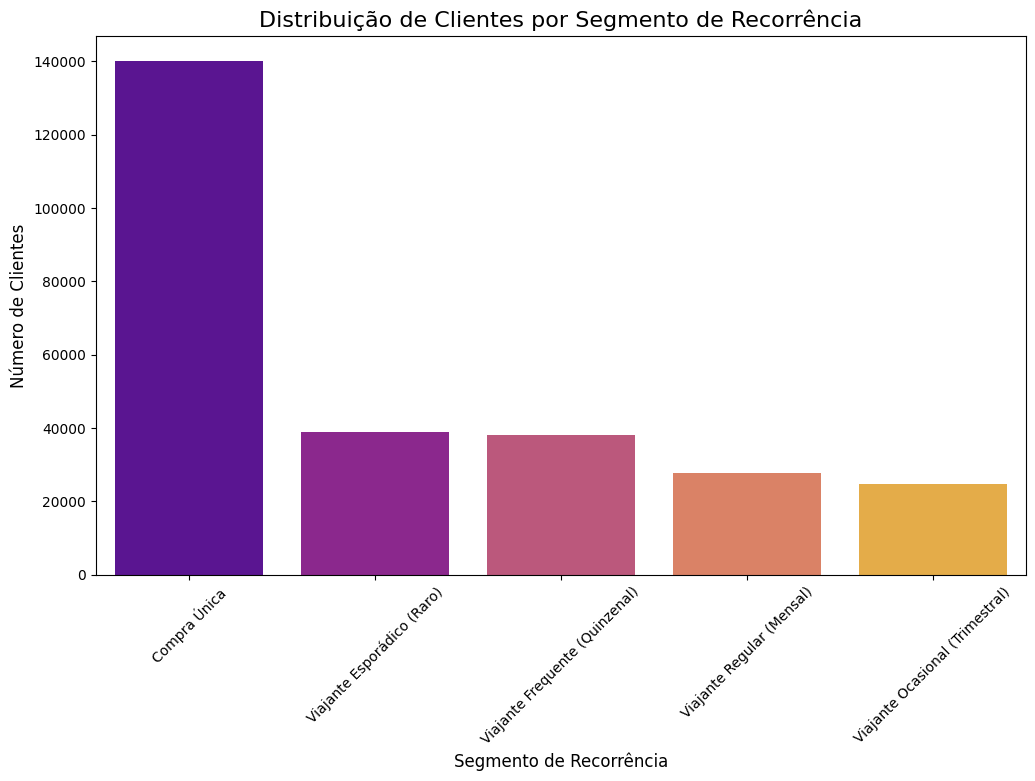

In [ ]:
segmento_recorrencia_counts = intervalo_compras['Segmento_Recorrencia'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=segmento_recorrencia_counts.index, y=segmento_recorrencia_counts.values, palette='plasma', order=segmento_recorrencia_counts.index)
plt.title('Distribuição de Clientes por Segmento de Recorrência', fontsize=16)
plt.xlabel('Segmento de Recorrência', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Previsão da Próxima Compra: Para um "Viajante Regular (Mensal)", por exemplo, você pode prever que a próxima compra ocorrerá aproximadamente 30-45 dias após a última. Isso permite o envio de campanhas de marketing (e-mails, push notifications) no momento exato em que o cliente está mais propenso a comprar.

* Identificação de Churn: Um "Viajante Frequente (Quinzenal)" que não compra há 30 dias é um forte candidato a ter se tornado inativo (churn). O sistema pode acionar alertas para uma ação de recuperação.

# --- PASSO 1: ENGENHARIA DE NOVOS ATRIBUTOS COMPORTAMENTAIS ---

In [ ]:

df_comportamento = df_ultimos_2_anos.copy()

df_comportamento['dia_semana'] = df_comportamento['data_compra'].dt.dayofweek

df_comportamento['viagem_dia_util'] = df_comportamento['dia_semana'] < 5

print("--- DataFrame com novos atributos (dia da semana e dia útil) ---")
display(df_comportamento[['id_cliente', 'data_compra', 'dia_semana', 'viagem_dia_util']].head())

--- DataFrame com novos atributos (dia da semana e dia útil) ---


,id_cliente,data_compra,dia_semana,viagem_dia_util
10,94376474,2022-07-14,3,True
11,5362074,2022-07-05,1,True
19,67348614,2022-07-30,5,False
20,92615343,2022-07-29,4,True
21,39414452,2024-03-28,3,True


# --- PASSO 2: AGREGAR OS ATRIBUTOS POR CLIENTE ---

In [ ]:
# Agrupar por cliente
perfil_viagem_df = df_comportamento.groupby('id_cliente').agg(

    pct_viagens_dia_util=('viagem_dia_util', 'mean'),

    n_rotas_unicas=('rota_completa', 'nunique'),

    concentracao_rota_principal=('rota_completa', lambda x: x.value_counts(normalize=True).iloc[0])
).reset_index()

print("\n--- Tabela com perfil de viagem agregado por cliente ---")
display(perfil_viagem_df.head())


--- Tabela com perfil de viagem agregado por cliente ---


,id_cliente,pct_viagens_dia_util,n_rotas_unicas,concentracao_rota_principal
0,1011,1.00,1,1.00
1,1118,1.00,2,0.50
2,1697,0.75,4,0.25
3,1732,0.50,2,0.75
4,2293,1.00,1,1.00


# --- PASSO 3: COMBINAR COM DADOS DE FREQUÊNCIA E CRIAR O SEGMENTO FINAL ---

In [ ]:
# Juntar com o df_frequencia
perfil_viagem_df = pd.merge(perfil_viagem_df, df_frequencia, on='id_cliente')


def segmentar_por_tipo_viagem(row):

    if row['concentracao_rota_principal'] >= 0.7 and row['frequencia'] > 5:
        return 'Ponte Rodoviária (Commuter)'

    elif row['pct_viagens_dia_util'] >= 0.75 and row['frequencia'] > 5:
        return 'Negócios'

    elif row['pct_viagens_dia_util'] <= 0.40 and row['frequencia'] > 2:
        return 'Lazer'

    else:
        return 'Misto / Indefinido'

perfil_viagem_df['Segmento_Tipo_Viagem'] = perfil_viagem_df.apply(segmentar_por_tipo_viagem, axis=1)

print("\n--- Tabela final com a segmentação por tipo de viagem ---")
display(perfil_viagem_df.sort_values(by='frequencia', ascending=False).head(10))


--- Tabela final com a segmentação por tipo de viagem ---


,id_cliente,pct_viagens_dia_util,n_rotas_unicas,concentracao_rota_principal,frequencia,Segmento_Tipo_Viagem
202362,75144664,0.769902,66,0.116685,917,Negócios
246332,91427687,0.966871,132,0.111656,815,Negócios
189725,70469330,0.939117,110,0.091324,657,Negócios
108187,40244210,0.998471,74,0.162080,654,Negócios
257251,95459735,0.673786,60,0.108738,515,Misto / Indefinido
146265,54345452,0.767347,71,0.200000,490,Negócios
262288,97334226,0.986333,108,0.077449,439,Negócios
236966,87923703,1.000000,23,0.289926,407,Negócios
18979,7003923,0.974160,85,0.111111,387,Negócios
40592,15078937,0.984085,3,0.511936,377,Negócios


# --- PASSO 4: VISUALIZAR A DISTRIBUIÇÃO DOS NOVOS SEGMENTOS ---

/tmp/ipython-input-4067624117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento_tipo_counts.index, y=segmento_tipo_counts.values, palette='cubehelix')


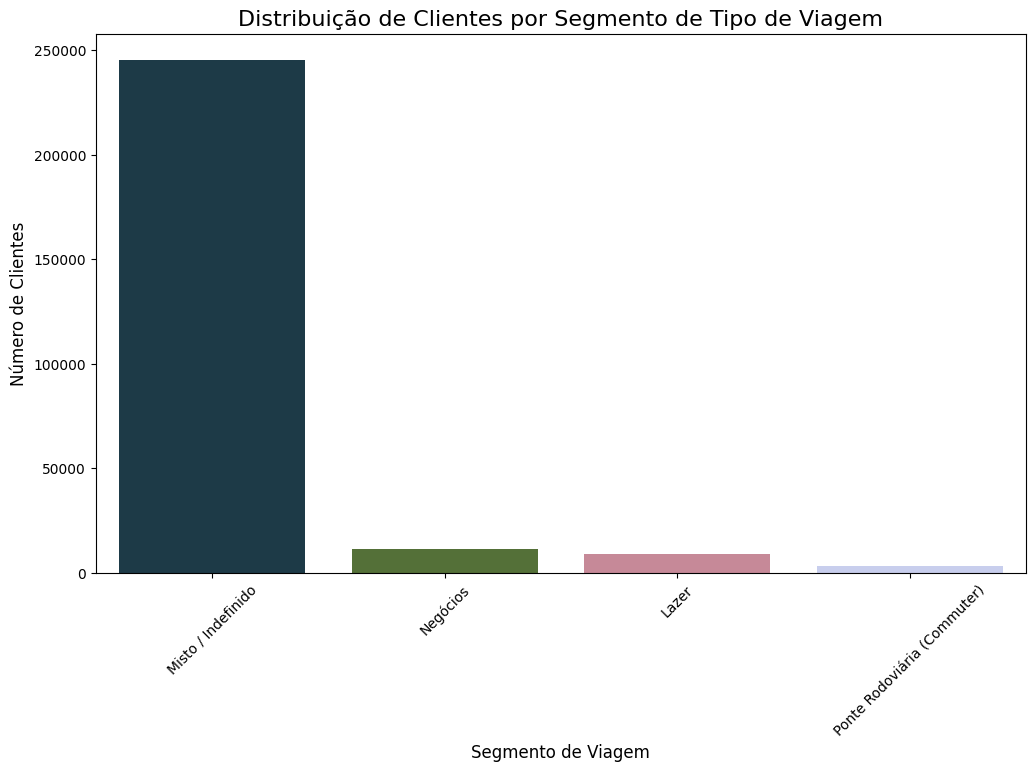

In [ ]:
segmento_tipo_counts = perfil_viagem_df['Segmento_Tipo_Viagem'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=segmento_tipo_counts.index, y=segmento_tipo_counts.values, palette='cubehelix')
plt.title('Distribuição de Clientes por Segmento de Tipo de Viagem', fontsize=16)
plt.xlabel('Segmento de Viagem', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# "Ponte Rodoviária" (Commuter):
Previsão do "O quê": A previsão da próxima rota é extremamente fácil. Será a mesma rota que ele sempre faz.

Previsão do "Quando": O intervalo entre suas compras tende a ser muito regular. Cruzando com a análise de recorrência anterior, você pode prever a data da próxima compra com alta precisão.

Viajantes de "Negócios":
Previsão do "Quando": As compras serão predominantemente em dias de semana. Modelos preditivos podem dar um peso maior para previsões que caiam entre segunda e sexta-feira.

Previsão do "O quê": As rotas tendem a ser entre centros comerciais. O modelo de recomendação pode focar em destinos como São Paulo, Brasília, Curitiba etc.

Viajantes a "Lazer":
Previsão do "Quando": A maior probabilidade de compra será para viagens em feriados e fins de semana. O modelo pode ser treinado para identificar a proximidade de um feriado como um gatilho importante para este segmento.

Previsão do "O quê": As rotas podem ser mais variadas. Aqui, um sistema de recomendação que sugere "novos destinos" com base em rotas populares para este segmento pode ser muito eficaz.

# --- PASSO 1: CONSOLIDAR TODAS AS SEGMENTAÇÕES EM UMA ÚNICA TABELA ---

In [ ]:
# --- PASSO 1: CONSOLIDAR TODAS AS SEGMENTAÇÕES EM UMA ÚNICA TABELA ---

df_final = rfm_df.copy()


df_final = pd.merge(df_final,
                    intervalo_compras[['id_cliente', 'Segmento_Recorrencia', 'media_intervalo']],
                    on='id_cliente',
                    how='left')

df_final = pd.merge(df_final,
                    perfil_viagem_df[['id_cliente', 'Segmento_Tipo_Viagem']],
                    on='id_cliente',
                    how='left')

print("--- Tabela Consolidada com todas as segmentações (Top 5 Clientes) ---")
display(df_final.sort_values(by='RFM_Score', ascending=False).head())

--- Tabela Consolidada com todas as segmentações (Top 5 Clientes) ---


,id_cliente,Recencia,Frequencia,ValorMonetario,R_Score,F_Score,M_Score,RFM_Score,Segmento,Segmento_Recorrencia,media_intervalo,Segmento_Tipo_Viagem
3,1732,51,4,767.00,4,4,4,12,Campeões,Viajante Esporádico (Raro),155.000000,Misto / Indefinido
95654,35646316,50,6,815.65,4,4,4,12,Campeões,Viajante Regular (Mensal),33.800000,Misto / Indefinido
95667,35652228,3,10,1527.32,4,4,4,12,Campeões,Viajante Regular (Mensal),22.888889,Misto / Indefinido
95673,35654284,94,6,1679.99,4,4,4,12,Campeões,Viajante Ocasional (Trimestral),60.000000,Misto / Indefinido
95679,35658049,27,3,736.92,4,4,4,12,Campeões,Viajante Ocasional (Trimestral),57.000000,Misto / Indefinido


# --- PASSO 2: DEFINIR AS PERSONAS FINAIS COM BASE NAS REGRAS DE NEGÓCIO ---

In [ ]:

def definir_persona(row):

    if row['Segmento'] == 'Campeões':
        if row['Segmento_Tipo_Viagem'] == 'Ponte Rodoviária (Commuter)':
            return 'Supercliente Commuter'
        elif row['Segmento_Tipo_Viagem'] == 'Negócios':
            return 'Viajante de Negócios VIP'
        else:
            return 'Cliente Ouro'


    elif row['Segmento'] == 'Clientes Leais':
        if row['Segmento_Tipo_Viagem'] == 'Ponte Rodoviária (Commuter)':
            return 'Commuter Fiel'
        else:
            return 'Cliente Fiel'


    elif row['Segmento'] == 'Clientes em Risco':
        return 'Cliente em Risco'
    elif row['Segmento'] == 'Hibernando':
        return 'Cliente Inativo'


    elif row['Segmento_Recorrencia'] == 'Compra Única':
        return 'Novo Viajante'


    elif row['Segmento'] == 'Potencialmente Leais':
        return 'Viajante Promissor'


    else:
        return 'Viajante Ocasional'

df_final['Persona'] = df_final.apply(definir_persona, axis=1)

print("\n--- Tabela Final com a Persona de cada Cliente (Top 10 Clientes) ---")
display(df_final.sort_values(by='RFM_Score', ascending=False).head(10))


--- Tabela Final com a Persona de cada Cliente (Top 10 Clientes) ---


,id_cliente,Recencia,Frequencia,ValorMonetario,R_Score,F_Score,M_Score,RFM_Score,Segmento,Segmento_Recorrencia,media_intervalo,Segmento_Tipo_Viagem,Persona
3,1732,51,4,767.00,4,4,4,12,Campeões,Viajante Esporádico (Raro),155.000000,Misto / Indefinido,Cliente Ouro
95654,35646316,50,6,815.65,4,4,4,12,Campeões,Viajante Regular (Mensal),33.800000,Misto / Indefinido,Cliente Ouro
95667,35652228,3,10,1527.32,4,4,4,12,Campeões,Viajante Regular (Mensal),22.888889,Misto / Indefinido,Cliente Ouro
95673,35654284,94,6,1679.99,4,4,4,12,Campeões,Viajante Ocasional (Trimestral),60.000000,Misto / Indefinido,Cliente Ouro
95679,35658049,27,3,736.92,4,4,4,12,Campeões,Viajante Ocasional (Trimestral),57.000000,Misto / Indefinido,Cliente Ouro
269310,99978692,49,3,1147.18,4,4,4,12,Campeões,Viajante Esporádico (Raro),279.000000,Misto / Indefinido,Cliente Ouro
34,11677,91,4,760.24,4,4,4,12,Campeões,Viajante Regular (Mensal),38.333333,Misto / Indefinido,Cliente Ouro
37,13419,51,23,2356.37,4,4,4,12,Campeões,Viajante Regular (Mensal),30.318182,Misto / Indefinido,Cliente Ouro
269319,99981620,95,3,1967.09,4,4,4,12,Campeões,Viajante Esporádico (Raro),179.000000,Misto / Indefinido,Cliente Ouro
95691,35660439,22,6,1471.17,4,4,4,12,Campeões,Viajante Ocasional (Trimestral),69.400000,Negócios,Viajante de Negócios VIP


# --- PASSO 3: VISUALIZAR A DISTRIBUIÇÃO DAS PERSONAS ---

/tmp/ipython-input-3203241812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=persona_counts.index, y=persona_counts.values, palette='magma')


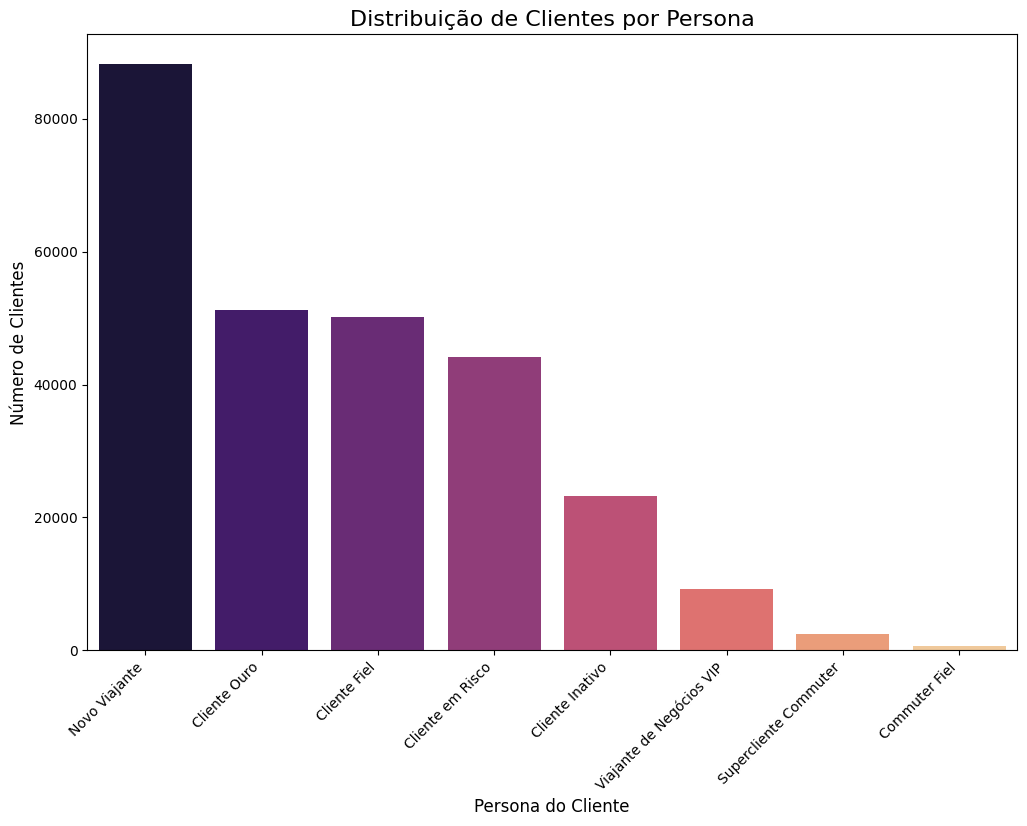

In [ ]:


persona_counts = df_final['Persona'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=persona_counts.index, y=persona_counts.values, palette='magma')
plt.title('Distribuição de Clientes por Persona', fontsize=16)
plt.xlabel('Persona do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

##Insight e Estratégias de Growth por Persona:
Com a coluna Persona, você agora tem grupos de clientes bem definidos para direcionar suas estratégias de Growth, como pedia o desafio:

Supercliente Commuter / Viajante de Negócios VIP:
Ação de Growth: Programas de assinatura ou "passaporte de viagens" com benefícios exclusivos para a rota principal. A previsão de compra é altamente regular.

Cliente Fiel / Commuter Fiel:
Ação de Growth: Campanhas de e-mail marketing e push com lembretes baseados no seu ciclo de compra (media_intervalo). Oferecer pequenos bônus por lealdade.

Novo Viajante:
Ação de Growth: O objetivo é a segunda compra. Enviar uma campanha de boas-vindas com um cupom de desconto para a próxima viagem dentro de 30-60 dias.

Cliente em Risco / Inativo:
Ação de Growth: Campanhas de reativação agressivas. E-mails com o assunto "Sentimos sua falta!" e os maiores descontos do seu arsenal de marketing.

Viajante Ocasional / Promissor:
Ação de Growth: Campanhas de push e e-mail marketing focadas em feriados, eventos e períodos de férias. Promover novos destinos para incentivar a exploração.

Essa segmentação final é a resposta direta ao desafio proposto, criando os grupos de clientes com base no histórico de compras para que possam ser tratados de forma personalizada pelas equipes de Growth e Marketing.

Descrição das Personas de Cliente
Aqui está uma descrição de cada segmento, seu perfil e a estratégia de Growth recomendada:
Clientes de Altíssimo Valor
1. Supercliente Commuter
Perfil: A elite dos seus clientes. Eles não apenas compram com altíssima frequência e gastam valores elevados (RFM "Campeões"), mas também exibem um comportamento extremamente previsível, viajando quase exclusivamente na mesma rota (ex: São Paulo ↔ Rio de Janeiro). Provavelmente viajam a trabalho ou para visitar a família com grande regularidade.
Estratégia de Growth: Foco em retenção máxima e aumento do lifetime value. Oferecer um programa de assinatura ou "passaporte de viagens" para a rota principal deles, com benefícios como descontos fixos, embarque prioritário ou remarcação flexível. A previsão da próxima compra é muito alta.
2. Viajante de Negócios VIP
Perfil: São clientes "Campeões" que viajam com alta frequência, gastam muito e fazem a maioria de suas compras em dias úteis. Eles não são fixos em uma única rota, mas seus destinos são geralmente grandes centros comerciais. Valorizam a eficiência e a conveniência.
Estratégia de Growth: Oferecer pacotes de viagens corporativas, benefícios como acesso a salas VIP (se houver parceria) ou serviços de upselling focados em conforto (assentos leito). As campanhas devem ser direcionadas para os dias de semana.
3. Cliente Ouro
Perfil: Este grupo inclui os demais clientes "Campeões" que não se encaixam perfeitamente nos perfis de Commuter ou Negócios. Eles são extremamente valiosos, compram recente e frequentemente, mas seus padrões de rota e dia da semana são mais variados. Podem ser viajantes a lazer com alto poder aquisitivo ou que misturam viagens de negócios e turismo.
Estratégia de Growth: Tratá-los com exclusividade. Oferecer acesso antecipado a promoções, um programa de fidelidade robusto com acúmulo de pontos e atendimento prioritário.
Clientes Leais
4. Commuter Fiel
Perfil: Similar ao "Supercliente Commuter", mas com um valor monetário ou frequência um pouco menor. Eles são a base sólida dos viajantes de "ponte rodoviária", com um padrão de rota muito consistente.
Estratégia de Growth: Nutri-los para que se tornem "Superclientes". Enviar lembretes e ofertas personalizadas para sua rota principal, baseados no seu ciclo médio de compra.
5. Cliente Fiel
Perfil: É a espinha dorsal da receita da ClickBus. Compram com boa frequência e gastam valores consideráveis. Não são necessariamente "Campeões", mas sua lealdade os torna previsíveis e valiosos.
Estratégia de Growth: Manter o engajamento através de comunicação regular, ofertas de aniversário e conteúdo relevante sobre os destinos que eles costumam visitar.
Clientes em Risco e Novos
6. Cliente em Risco
Perfil: Eram clientes que compravam com boa frequência ou gastavam bem, mas não o fazem há um tempo considerável (baixa recência). Há um alto risco de terem migrado para um concorrente ou simplesmente parado de viajar.
Estratégia de Growth: Ações de reativação urgentes. Enviar campanhas de e-mail e push com o tema "Sentimos sua falta!" e oferecer os descontos mais atrativos para incentivá-los a fazer uma nova compra e reiniciar o ciclo.
7. Cliente Inativo (Hibernando)
Perfil: Clientes com as piores pontuações de recência e frequência. Estão há muito tempo sem comprar e a probabilidade de retornarem espontaneamente é muito baixa.
Estratégia de Growth: Campanhas de "última chance" com cupons de alto valor. Se não houver resposta, podem ser movidos para uma base de contatos menos frequente para não aumentar os custos de marketing.
8. Novo Viajante
Perfil: Clientes que realizaram apenas uma compra. O desafio aqui é garantir que eles voltem para uma segunda compra e não se tornem clientes de uma única vez.
Estratégia de Growth: Ações de conversão para lealdade. Enviar um e-mail de agradecimento pela primeira compra com um cupom de desconto para a próxima viagem. O objetivo é incentivá-los a experimentar o serviço novamente.
Clientes com Potencial e Ocasionais
9. Viajante Promissor
Perfil: Clientes que compraram recentemente, mas com baixa frequência, ou que compraram algumas vezes no passado, mas precisam de um "empurrãozinho" para se tornarem leais.
Estratégia de Growth: Nutrição e engajamento. Enviar newsletters com sugestões de destinos e promoções para mantê-los conectados à marca e incentivá-los a comprar novamente.
10. Viajante Ocasional
Perfil: Este é um grupo geral que inclui clientes com baixa frequência e baixo valor, cujo comportamento não se encaixa em nenhum dos perfis mais específicos. Geralmente, viajam de forma esporádica e sem um padrão claro.
Estratégia de Growth: Campanhas de massa focadas em grandes feriados e períodos de alta temporada (Natal, Carnaval, Férias de Julho), pois é nesses momentos que eles são mais propensos a viajar.

# O Timing é Tudo

## --- CARREGAR E TRATAR O SEU ARQUIVO CSV DE FERIADOS ---

In [ ]:
df_feriados_bruto = pd.read_csv('feriados_filtrados.csv')

feriados_series = pd.concat([df_feriados_bruto['feriados_x'], df_feriados_bruto['feriados_y']]).dropna().drop_duplicates()

df_feriados_limpo = feriados_series.str.split(' - ', expand=True)

df_feriados_limpo.columns = ['Data', 'Nome_Feriado']

df_feriados_limpo['Data'] = pd.to_datetime(df_feriados_limpo['Data'], format='%d/%m/%Y')

df_feriados_limpo.dropna(inplace=True)


print("--- Tabela de Feriados Limpa e Pronta para Uso (primeiras 5 linhas) ---")
display(df_feriados_limpo.head())

--- Tabela de Feriados Limpa e Pronta para Uso (primeiras 5 linhas) ---


,Data,Nome_Feriado
0,2021-12-25,Natal
18,2021-11-20,Dia da Consciência Negra
36,2021-11-15,Proclamação da República
54,2021-11-02,Dia de Finados
72,2021-10-12,Nossa Senhora Aparecida


## --- ENRIQUECER O DATAFRAME DE COMPRAS COM AS INFORMAÇÕES DO SEU CSV ---

In [ ]:


# Ordenar os dataframes por data
df_compras_sorted = df_ultimos_2_anos.sort_values('data_compra').copy()
df_feriados_sorted = df_feriados_limpo.sort_values('Data').copy()

df_enriquecido = pd.merge_asof(
    df_compras_sorted,
    df_feriados_sorted,
    left_on='data_compra',
    right_on='Data',
    direction='forward'
)

df_enriquecido['antecedencia_feriado'] = (df_enriquecido['Data'] - df_enriquecido['data_compra']).dt.days

df_enriquecido.rename(columns={'Data': 'data_prox_feriado', 'Nome_Feriado': 'nome_prox_feriado'}, inplace=True)

print("\n--- DataFrame enriquecido com os dados do seu CSV (amostra) ---")
display(df_enriquecido[['id_cliente', 'data_compra', 'data_prox_feriado', 'nome_prox_feriado', 'antecedencia_feriado']].head())


--- DataFrame enriquecido com os dados do seu CSV (amostra) ---


,id_cliente,data_compra,data_prox_feriado,nome_prox_feriado,antecedencia_feriado
0,18281482,2022-04-01,2022-04-13,Aniversário de Fortaleza,12.0
1,5892756,2022-04-01,2022-04-13,Aniversário de Fortaleza,12.0
2,90707937,2022-04-01,2022-04-13,Aniversário de Fortaleza,12.0
3,12204067,2022-04-01,2022-04-13,Aniversário de Fortaleza,12.0
4,654779,2022-04-01,2022-04-13,Aniversário de Fortaleza,12.0


## --- CRIAR NOVOS SEGMENTOS DE CLIENTES COM BASE EM FERIADOS ---


--- Tabela Final com a Nova Segmentação por Feriado ---


,id_cliente,media_antecedencia_feriado,compras_prox_feriado,frequencia,pct_compras_feriado,Segmento_Feriado
0,1011,2.0000,1,1,1.000000,Viajante de Feriado (Última Hora)
1,1118,14.0000,2,2,1.000000,Viajante de Feriado (Última Hora)
2,1697,2.7500,4,4,1.000000,Viajante de Feriado (Última Hora)
3,1732,12.0000,3,4,0.750000,Viajante de Feriado (Última Hora)
4,2293,NaN,0,1,0.000000,Não Focado em Feriado
5,2376,10.0000,1,1,1.000000,Viajante de Feriado (Última Hora)
6,2399,1.0000,1,1,1.000000,Viajante de Feriado (Última Hora)
7,2504,NaN,0,1,0.000000,Não Focado em Feriado
8,2822,8.3125,16,19,0.842105,Viajante de Feriado (Última Hora)
9,2943,4.0000,2,6,0.333333,Não Focado em Feriado


/tmp/ipython-input-851784139.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento_feriado_counts.index, y=segmento_feriado_counts.values, palette='autumn')


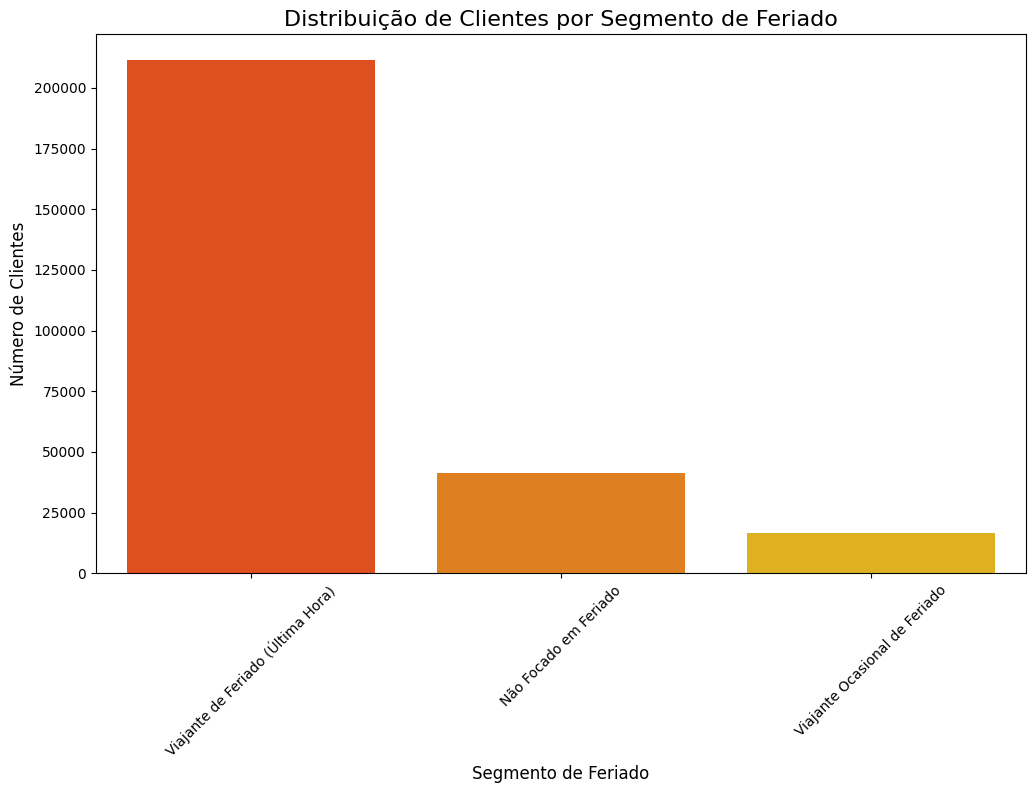

In [ ]:
# Agrupar por cliente para analisar o comportamento
perfil_feriado_df = df_enriquecido.groupby('id_cliente').agg(

    media_antecedencia_feriado=('antecedencia_feriado', 'mean'),

    compras_prox_feriado=('antecedencia_feriado', lambda x: (x <= 30).sum())
).reset_index()

perfil_feriado_df = pd.merge(perfil_feriado_df, df_frequencia, on='id_cliente')

perfil_feriado_df['pct_compras_feriado'] = perfil_feriado_df['compras_prox_feriado'] / perfil_feriado_df['frequencia']

def segmentar_por_feriado(row):
    if row['pct_compras_feriado'] >= 0.75:
        if row['media_antecedencia_feriado'] > 30:
            return 'Planejador de Feriado'
        else:
            return 'Viajante de Feriado (Última Hora)'
    elif row['pct_compras_feriado'] >= 0.4:
        return 'Viajante Ocasional de Feriado'
    else:
        return 'Não Focado em Feriado'

perfil_feriado_df['Segmento_Feriado'] = perfil_feriado_df.apply(segmentar_por_feriado, axis=1)

print("\n--- Tabela Final com a Nova Segmentação por Feriado ---")
display(perfil_feriado_df.head(10))

segmento_feriado_counts = perfil_feriado_df['Segmento_Feriado'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=segmento_feriado_counts.index, y=segmento_feriado_counts.values, palette='autumn')
plt.title('Distribuição de Clientes por Segmento de Feriado', fontsize=16)
plt.xlabel('Segmento de Feriado', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Etapa 1: Limpeza e Organização do Arquivo de Feriados
O Problema: Seu arquivo feriados_filtrados.csv não estava pronto para ser usado. Ele tinha dois grandes problemas:
Estrutura Duplicada: As colunas feriados_x e feriados_y continham muita informação repetida. Para uma análise, precisamos de uma lista única e limpa de feriados, sem redundâncias.

Formato de Texto: As datas estavam como texto (ex: "25/12/2021 - Natal"). O computador não entende isso como uma data real, então não podemos fazer cálculos com ela (como ver a diferença de dias).

A Lógica da Solução:
Juntar Tudo: A primeira coisa que o código faz é pegar as duas colunas (feriados_x e feriados_y), empilhá-las uma sobre a outra (pd.concat) para criar uma única lista com todos os feriados mencionados no arquivo.

Remover Duplicatas: Em seguida, ele usa .dropna().drop_duplicates() para limpar essa lista, garantindo que cada feriado apareça apenas uma vez.

Separar Data e Nome: A etapa crucial é usar .str.split(' - ', expand=True).

Essa função "quebra" o texto em duas partes, usando o " - " como ponto de separação. Isso cria duas novas colunas: uma com a data em texto ("25/12/2021") e outra com o nome do feriado ("Natal").

Converter para Datas Reais: Por fim, usamos pd.to_datetime() para transformar a coluna de texto de datas em um formato que o Python entende como um calendário. Isso é o que nos permite fazer cálculos de tempo.
Resultado da Etapa 1: Saímos de um CSV confuso e criamos uma tabela de referência limpa e organizada (df_feriados_limpo), que é essencialmente um calendário de feriados que podemos usar para consulta.

##Etapa 2: Enriquecimento dos Dados (O Cruzamento Inteligente)

O Problema: Agora temos duas tabelas: uma com as compras dos clientes e outra com os feriados. Como sabemos se uma compra feita no dia "10/12/2023" foi motivada pelo feriado de "Natal" no dia "25/12/2023"? Um merge normal não funciona, pois as datas são diferentes.

A Lógica da Solução:
merge_asof (A Ferramenta Certa): A lógica aqui é usar uma função especial do Pandas chamada merge_asof. Ela foi projetada exatamente para isso: cruzar dados baseados na proximidade de datas.

Ordenar as Tabelas: Para que o merge_asof funcione, as duas tabelas precisam estar ordenadas por data. O código faz isso primeiro.

A "Mágica" do direction='forward': Este é o parâmetro chave. Ele instrui a função da seguinte maneira: "Para cada data de compra na tabela de clientes, olhe para a frente na tabela de feriados e encontre o primeiro feriado que acontece nessa data ou depois dela."

Cálculo da Antecedência: Ao fazer isso, cada linha de compra agora tem uma nova coluna com a data do próximo feriado. A lógica final desta etapa é simplesmente subtrair as duas datas (data_prox_feriado - data_compra) para criar a nossa métrica mais importante: antecedencia_feriado, que nos diz quantos dias antes do próximo feriado a compra foi feita.

Resultado da Etapa 2: Transformamos nosso DataFrame de compras. Agora, cada transação está "enriquecida" com o contexto do próximo feriado, nos permitindo analisar o comportamento do cliente em relação a esses eventos.

##Etapa 3: Segmentação por Comportamento (A Criação dos Grupos)

O Problema: Temos a antecedência de compra para cada transação, mas precisamos entender o comportamento de cada cliente de forma consolidada. Um cliente que sempre compra 15 dias antes de feriados é diferente de um que compra 3 dias antes.

A Lógica da Solução:
Agrupar por Cliente: Primeiro, usamos .groupby('id_cliente') para analisar todas as compras de um mesmo cliente de uma vez.

Criar Métricas Comportamentais: Para cada cliente, calculamos duas métricas-chave:
media_antecedencia_feriado: Qual a média de dias de antecedência que este cliente costuma comprar antes de um feriado? Isso nos diz se ele é um planejador ou um comprador de última hora.

compras_prox_feriado: Quantas das suas compras foram feitas em um intervalo próximo a um feriado (no código, definimos como 30 dias)? Isso nos ajuda a saber se o cliente é motivado por feriados.

Normalizar a Métrica: Apenas contar as compras de feriado não é suficiente. Por isso, calculamos o percentual (pct_compras_feriado) que essas compras representam do total de compras do cliente. Um cliente com 80% de suas compras perto de feriados é claramente um "viajante de feriado".

Aplicar Regras de Negócio: A função segmentar_por_feriado é onde a "mágica" final acontece. Ela aplica uma série de regras lógicas para classificar cada

cliente em um grupo definitivo:
REGRA 1: Se a grande maioria das compras (>= 75%) é perto de feriados, ele é um "Viajante de Feriado". Dentro desse grupo, olhamos a media_antecedencia_feriado para saber se ele é "Planejador" ou "Última Hora".

REGRA 2: Se não for tão dominante, mas ainda relevante (>= 40%), ele é um "Viajante Ocasional de Feriado".
REGRA 3: Se nada disso for verdade, ele é "Não Focado em Feriado".

Resultado Final: Ao final dessas três etapas, cada cliente no seu dataset tem um novo rótulo (Segmento_Feriado) que resume seu comportamento de compra em relação aos feriados, permitindo que a equipe de marketing crie campanhas muito mais direcionadas e eficazes.

# Extra: prever o número de dias até a próxima compra do cliente.


## --- PREPARAR OS DADOS PARA O MODELO PREDITIVO ---

In [ ]:
# Filtrar apenas clientes com mais de uma compra
df_recorrentes = df_ultimos_2_anos.groupby('id_cliente').filter(lambda x: len(x) > 1)

df_recorrentes = df_recorrentes.sort_values(by=['id_cliente', 'data_compra'])

df_recorrentes['intervalo_dias'] = df_recorrentes.groupby('id_cliente')['data_compra'].diff().dt.days

dados_treinamento = df_recorrentes.groupby('id_cliente').tail(1).copy()
dados_treinamento = dados_treinamento[['id_cliente', 'intervalo_dias']]

print("--- Variável Alvo (Intervalo de Dias) para cada cliente ---")
display(dados_treinamento.head())

--- Variável Alvo (Intervalo de Dias) para cada cliente ---


,id_cliente,intervalo_dias
425808,1118,230.0
956474,1697,4.0
960668,1732,371.0
1211945,2822,68.0
1663072,2943,0.0


## --- ENGENHARIA DE ATRIBUTOS (FEATURE ENGINEERING) ---

In [ ]:
df_features_base = df_recorrentes.groupby('id_cliente').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)


features_intervalo = df_features_base.groupby('id_cliente')['intervalo_dias'].agg(
    ['mean', 'std', 'min', 'max']
).reset_index()
features_intervalo.columns = ['id_cliente', 'media_intervalo', 'std_intervalo', 'min_intervalo', 'max_intervalo']

snapshot_date_features = df_features_base['data_compra'].max() + pd.DateOffset(days=1)
features_rfm = df_features_base.groupby('id_cliente').agg(
    Recencia=('data_compra', lambda date: (snapshot_date_features - date.max()).days),
    Frequencia=('id_compra', 'count'),
    ValorMonetario=('valor_total_ticket', 'sum')
).reset_index()

df_final_features = pd.merge(features_intervalo, features_rfm, on='id_cliente')
df_final_features.fillna(0, inplace=True)

df_modelo = pd.merge(dados_treinamento, df_final_features, on='id_cliente')


print("\n--- DataFrame final para treinamento do modelo ---")
display(df_modelo.head())

/tmp/ipython-input-4245552965.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features_base = df_recorrentes.groupby('id_cliente').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)



--- DataFrame final para treinamento do modelo ---


,id_cliente,intervalo_dias,media_intervalo,std_intervalo,min_intervalo,max_intervalo,Recencia,Frequencia,ValorMonetario
0,1118,230.0,0.000000,0.000000,0.0,0.0,452,1,167.20
1,1697,4.0,17.500000,3.535534,15.0,20.0,343,3,1207.77
2,1732,371.0,47.000000,60.811183,4.0,90.0,422,3,634.84
3,2822,68.0,37.470588,73.546854,0.0,292.0,90,18,10720.58
4,2943,0.0,56.250000,67.292273,5.0,152.0,17,5,1239.13


## --- TREINAR O MODELO DE MACHINE LEARNING ---

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1645
[LightGBM] [Info] Number of data points in the train set: 103479, number of used features: 7
[LightGBM] [Info] Start training from score 84.421805
\n--- Performance do Modelo de Previsão ---
Erro Médio Absoluto (MAE): 82.43 dias
Raiz do Erro Quadrático Médio (RMSE): 116.73 dias
\nIsso significa que, em média, o modelo erra a previsão em torno de 82 dias.


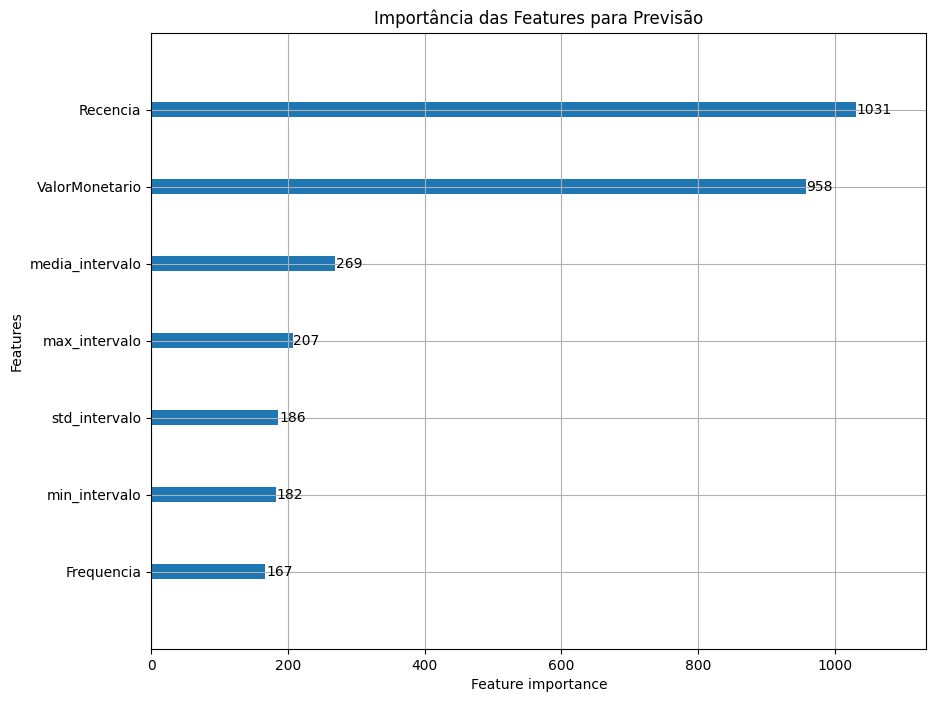

In [ ]:

X = df_modelo.drop(columns=['id_cliente', 'intervalo_dias'])
y = df_modelo['intervalo_dias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\\n--- Performance do Modelo de Previsão ---")
print(f"Erro Médio Absoluto (MAE): {mae:.2f} dias")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f} dias")
print(f"\\nIsso significa que, em média, o modelo erra a previsão em torno de {mae:.0f} dias.")

lgb.plot_importance(lgbm, figsize=(10, 8), title='Importância das Features para Previsão')
plt.show()

# Prever qual o trecho específico (parorigem-destino) um cliente tem maior probabilidade de comprar em sua próxima viagem. Pode ser abordado como classificação multi-classe ou recomendação.

## 1. Classificação Multiclasse (Abordagem de Machine Learning "Clássico")
Lógica: Tratar cada rota única (ex: "São Paulo para Brasília", "Rio de Janeiro para Curitiba") como uma categoria separada. O objetivo do modelo seria prever, para um determinado cliente, qual dessas centenas ou milhares de categorias ele irá escolher na próxima compra.

Vantagens: Pode funcionar bem se o número de rotas for relativamente pequeno e se os clientes tiverem padrões muito claros e repetitivos.

Desvantagens:
Escalabilidade: Se você tem milhares de rotas, o modelo pode ficar muito complexo e difícil de treinar.

Rotas Novas: Ele não consegue prever que um cliente comprará uma rota que nunca comprou antes.

Esparsidade: Muitos clientes terão comprado apenas algumas poucas rotas, tornando difícil para o modelo aprender padrões significativos.

## 2. Sistema de Recomendação (Abordagem de "Similaridade")
Lógica: Esta abordagem não tenta prever uma categoria exata. Em vez disso, ela se baseia na ideia de similaridade. A premissa é: "Clientes que compraram rotas semelhantes no passado provavelmente comprarão rotas semelhantes no futuro".

 A recomendação pode ser baseada em:
Filtragem Colaborativa: "Clientes parecidos com você também compraram a rota X."
Filtragem Baseada em Conteúdo/Item: "Como você comprou a rota 'São Paulo -> Rio', talvez você também goste da rota 'São Paulo -> Curitiba', pois ambas partem de São Paulo e são para grandes capitais."

Popularidade e Associação: "A rota que você mais compra é 'A -> B'. Pessoas que compram 'A -> B' também frequentemente compram a rota de volta 'B -> A' ou a rota 'A -> C'."

Vantagens:
Flexibilidade: Consegue recomendar rotas que o cliente nunca comprou.

Personalização: É excelente para encontrar "joias escondidas" ou sugerir novos destinos relevantes.

Escalabilidade: Lida melhor com um grande número de itens (rotas).

##   1. Rota Mais Frequente por Cliente (Recomendação de Popularidade Pessoal)

In [ ]:

rota_preferida = df_ultimos_2_anos.groupby('id_cliente')['rota_completa'].agg(lambda x: x.mode().iloc[0]).reset_index()
rota_preferida.rename(columns={'rota_completa': 'rota_mais_frequente'}, inplace=True)

print("--- Rota mais frequente de cada cliente ---")
display(rota_preferida.head())

--- Rota mais frequente de cada cliente ---


,id_cliente,rota_mais_frequente
0,1011,Rio de Janeiro para Divinopolis
1,1118,Curitiba para Rio de Janeiro
2,1697,Curitiba para Vila Velha
3,1732,Juiz de Fora para Juiz de Fora
4,2293,Piracicaba para Rio de Janeiro


## 2. Regras de Associação: "Pessoas que compraram a Rota X também compraram a Rota Y"

In [ ]:

rotas_por_cliente = df_ultimos_2_anos.groupby('id_cliente')['rota_completa'].apply(list).reset_index()


pares_de_rotas = []
for index, row in rotas_por_cliente.iterrows():
    rotas = sorted(list(set(row['rota_completa'])))
    if len(rotas) > 1:
        from itertools import combinations

        pares_de_rotas.extend(list(combinations(rotas, 2)))


from collections import Counter
frequencia_pares = Counter(pares_de_rotas)

df_associacao = pd.DataFrame(frequencia_pares.items(), columns=['par_de_rotas', 'frequencia_associacao'])
df_associacao[['rota_A', 'rota_B']] = pd.DataFrame(df_associacao['par_de_rotas'].tolist(), index=df_associacao.index)
df_associacao = df_associacao.sort_values(by='frequencia_associacao', ascending=False)


print("\n--- Rotas mais frequentemente compradas juntas ---")
display(df_associacao.head(10))


--- Rotas mais frequentemente compradas juntas ---


,par_de_rotas,frequencia_associacao,rota_A,rota_B
186,"(Brasilia para Sao Paulo, Sao Paulo para Brasi...",4887,Brasilia para Sao Paulo,Sao Paulo para Brasilia
393,"(Goiania para Sao Paulo, Sao Paulo para Goiania)",3189,Goiania para Sao Paulo,Sao Paulo para Goiania
350,"(Curitiba para Sao Paulo, Sao Paulo para Curit...",1645,Curitiba para Sao Paulo,Sao Paulo para Curitiba
491,"(Pocos de Caldas para Sao Paulo, Sao Paulo par...",1396,Pocos de Caldas para Sao Paulo,Sao Paulo para Pocos de Caldas
556,"(Juiz de Fora para Sao Paulo, Sao Paulo para J...",1366,Juiz de Fora para Sao Paulo,Sao Paulo para Juiz de Fora
468,"(Brasilia para Recife, Recife para Brasilia)",1338,Brasilia para Recife,Recife para Brasilia
351,"(Guarulhos para Sao Paulo, Sao Paulo para Guar...",1166,Guarulhos para Sao Paulo,Sao Paulo para Guarulhos
214,"(Brasilia para Juiz de Fora, Juiz de Fora para...",1111,Brasilia para Juiz de Fora,Juiz de Fora para Brasilia
153,"(Florianopolis para Sao Paulo, Sao Paulo para ...",1086,Florianopolis para Sao Paulo,Sao Paulo para Florianopolis
500,"(Araraquara para Juiz de Fora, Juiz de Fora pa...",1078,Araraquara para Juiz de Fora,Juiz de Fora para Araraquara


In [ ]:
def recomendar_proximo_trecho(id_cliente_alvo):
    """
    Recomenda o próximo trecho para um cliente com base em seu histórico
    e nas associações de rotas mais comuns.
    """
    try:
        rota_principal_cliente = rota_preferida[rota_preferida['id_cliente'] == id_cliente_alvo]['rota_mais_frequente'].iloc[0]
    except IndexError:
        return "Cliente não encontrado ou sem histórico."

    associacoes_A = df_associacao[df_associacao['rota_A'] == rota_principal_cliente]
    associacoes_B = df_associacao[df_associacao['rota_B'] == rota_principal_cliente]

    if not associacoes_A.empty:
        recomendacao = associacoes_A.iloc[0]['rota_B']
        return recomendacao
    elif not associacoes_B.empty:
        recomendacao = associacoes_B.iloc[0]['rota_A']
        return recomendacao
    else:
        return rota_principal_cliente


# --- EXEMPLO DE USO ---
cliente_exemplo = df_ultimos_2_anos['id_cliente'].sample(1).iloc[0]

proximo_trecho_recomendado = recomendar_proximo_trecho(cliente_exemplo)
rota_real_mais_frequente = rota_preferida[rota_preferida['id_cliente'] == cliente_exemplo]['rota_mais_frequente'].iloc[0]

print(f"\\n--- Exemplo de Recomendação ---")
print(f"Para o cliente ID: {cliente_exemplo}")
print(f"Sua rota mais frequente é: '{rota_real_mais_frequente}'")
print(f"Com base no comportamento de outros clientes, recomendamos a próxima viagem para: '{proximo_trecho_recomendado}'")

\n--- Exemplo de Recomendação ---
Para o cliente ID: 45565133
Sua rota mais frequente é: 'Belo Horizonte para Juiz de Fora'
Com base no comportamento de outros clientes, recomendamos a próxima viagem para: 'Juiz de Fora para Belo Horizonte'


Como Usar na Prática

Esta função recomendar_proximo_trecho é o seu motor de recomendação. Você pode:
Integrar com Campanhas de E-mail/Push: Para cada cliente da sua base, você pode chamar essa função para obter a recomendação de trecho mais provável. Em seguida, pode enviar um e-mail com o assunto: "Pensando em viajar para [trecho_recomendado] novamente? Temos uma oferta para você!".

Personalizar a Página Inicial do Site/App: Ao detectar que um cliente logou, você pode chamar a função e destacar a rota recomendada no banner principal ou na busca.

Melhorar Modelos de Propensão: A rota recomendada pode se tornar uma feature poderosa para um modelo de propensão de compra.

# Código Passo a Passo: Combinando os Modelos para uma Previsão Completa

## Modelo de Propensão (Classificação Binária):
Primeiro, rodamos um modelo para identificar QUAIS clientes têm a maior probabilidade de comprar nos próximos 7 ou 30 dias.

## Modelo de Recomendação (Associação):
 Em seguida, APENAS para os clientes que o primeiro modelo identificou como "prováveis compradores", nós rodamos o segundo modelo para prever QUAL trecho eles provavelmente comprarão.

## Cálculo da Data Prevista (Regressão):
 E, como bônus, para esse mesmo grupo de clientes "quentes", usamos o modelo de regressão (que prevê o número de dias até a compra) para estimar a DATA provável da compra.


# --- CRIAR O MODELO DE CLASSIFICAÇÃO BINÁRIA (PROPENSÃO DE COMPRA) ---

In [ ]:
df_classificacao = df_modelo.copy()

df_classificacao['comprou_em_30_dias'] = (df_classificacao['intervalo_dias'] <= 30).astype(int)

X_clf = df_classificacao.drop(columns=['id_cliente', 'intervalo_dias', 'comprou_em_30_dias'])
y_clf = df_classificacao['comprou_em_30_dias']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

lgbm_clf = lgb.LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train_clf, y_train_clf)

y_pred_proba_clf = lgbm_clf.predict_proba(X_test_clf)[:, 1]

auc = roc_auc_score(y_test_clf, y_pred_proba_clf)
print(f"--- Performance do Modelo de Propensão de Compra ---")
print(f"AUC (Área Sob a Curva ROC): {auc:.4f}")
print("(Quanto mais próximo de 1, melhor o modelo em distinguir compradores de não-compradores)")

[LightGBM] [Info] Number of positive: 56114, number of negative: 47365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1648
[LightGBM] [Info] Number of data points in the train set: 103479, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542274 -> initscore=0.169502
[LightGBM] [Info] Start training from score 0.169502
--- Performance do Modelo de Propensão de Compra ---
AUC (Área Sob a Curva ROC): 0.6871
(Quanto mais próximo de 1, melhor o modelo em distinguir compradores de não-compradores)


# --- PREPARAR O DATASET FINAL PARA PREVISÃO ---

In [ ]:
df_predicao_base = df_recorrentes.copy()

features_intervalo_final = df_predicao_base.groupby('id_cliente')['intervalo_dias'].agg(
    ['mean', 'std', 'min', 'max']
).reset_index()
features_intervalo_final.columns = ['id_cliente', 'media_intervalo', 'std_intervalo', 'min_intervalo', 'max_intervalo']

snapshot_date_final = df_predicao_base['data_compra'].max() + pd.DateOffset(days=1)
features_rfm_final = df_predicao_base.groupby('id_cliente').agg(
    Recencia=('data_compra', lambda date: (snapshot_date_final - date.max()).days),
    Frequencia=('id_compra', 'count'),
    ValorMonetario=('valor_total_ticket', 'sum')
).reset_index()

df_para_prever = pd.merge(features_intervalo_final, features_rfm_final, on='id_cliente')
df_para_prever.fillna(0, inplace=True)
df_para_prever = df_para_prever.astype({col: 'float64' for col in df_para_prever.columns if col != 'id_cliente'})


print("\\n--- DataFrame pronto para receber as previsões ---")
display(df_para_prever.head())

\n--- DataFrame pronto para receber as previsões ---


,id_cliente,media_intervalo,std_intervalo,min_intervalo,max_intervalo,Recencia,Frequencia,ValorMonetario
0,1118,230.000000,0.000000,230.0,230.0,222.0,2.0,544.78
1,1697,13.000000,8.185353,4.0,20.0,339.0,4.0,1570.51
2,1732,155.000000,191.940095,4.0,371.0,51.0,4.0,767.00
3,2822,39.166667,71.712867,0.0,292.0,22.0,19.0,11231.90
4,2943,45.000000,63.474404,0.0,152.0,17.0,6.0,1416.12


# --- APLICAR OS 3 MODELOS E GERAR A PREVISÃO COMPLETA ---

In [ ]:


print("Iniciando a criação do CSV completo para o dashboard...")

def definir_persona_simplificada(row):

    persona_original = row['Persona']

    if persona_original in ['Supercliente Commuter', 'Viajante de Negócios VIP', 'Cliente Ouro']:
        return 'Cliente de Alto Valor'
    elif persona_original in ['Commuter Fiel', 'Cliente Fiel', 'Viajante Promissor']:
        return 'Cliente Recorrente'
    elif persona_original in ['Cliente em Risco', 'Cliente Inativo']:
        return 'Cliente em Risco'
    elif persona_original == 'Novo Viajante':
        return 'Novo Cliente'
    else:
        return 'Cliente Ocasional'

df_dashboard_final = df_para_prever.copy()

features_para_modelos = df_dashboard_final.drop(columns=['id_cliente'])
df_dashboard_final['prob_compra_30d'] = lgbm_clf.predict_proba(features_para_modelos)[:, 1]
df_dashboard_final['dias_ate_prox_compra'] = lgbm.predict(features_para_modelos)
df_dashboard_final['dias_ate_prox_compra'] = df_dashboard_final['dias_ate_prox_compra'].round().astype(int).clip(lower=1)

hoje = pd.to_datetime(datetime.date.today())
df_dashboard_final['data_prevista_compra'] = hoje + pd.to_timedelta(df_dashboard_final['dias_ate_prox_compra'], unit='D')

df_associacao_forte = df_associacao[df_associacao['frequencia_associacao'] > 10].copy()
mapa_recomendacao_A = df_associacao_forte.set_index('rota_A')['rota_B'].to_dict()
mapa_recomendacao_B = df_associacao_forte.set_index('rota_B')['rota_A'].to_dict()
df_dashboard_final = pd.merge(df_dashboard_final, rota_preferida, on='id_cliente', how='left')
df_dashboard_final['recomendacao'] = df_dashboard_final['rota_mais_frequente'].map(mapa_recomendacao_A)
df_dashboard_final['recomendacao'].fillna(df_dashboard_final['rota_mais_frequente'].map(mapa_recomendacao_B), inplace=True)
df_dashboard_final['trecho_recomendado'] = df_dashboard_final['recomendacao'].fillna(df_dashboard_final['rota_mais_frequente'])

# ENRIQUECER COM AS SEGMENTAÇÕES DETALHADAS E SIMPLIFICADAS
df_dashboard_final = pd.merge(df_dashboard_final, df_final[['id_cliente', 'Persona']], on='id_cliente', how='left')
df_dashboard_final['Persona_Simplificada'] = df_dashboard_final.apply(definir_persona_simplificada, axis=1)
df_dashboard_final = pd.merge(df_dashboard_final, perfil_feriado_df[['id_cliente', 'Segmento_Feriado']], on='id_cliente', how='left')

colunas_finais = [
    'id_cliente',
    'Persona_Simplificada',
    'prob_compra_30d',
    'dias_ate_prox_compra',
    'trecho_recomendado',
    'data_prevista_compra',
    'Segmento_Feriado',
    'Persona'
]
colunas_existentes = [col for col in colunas_finais if col in df_dashboard_final.columns]
df_dashboard_final = df_dashboard_final[colunas_existentes]


print("\\n--- Tabela final e completa para o Dashboard (amostra) ---\n")
display(df_dashboard_final.sort_values(by='prob_compra_30d', ascending=False).head())

df_dashboard_final.to_csv('dashboard_previsao_final.csv', index=False, encoding='utf-8-sig', decimal=',')

print("\\nArquivo 'dashboard_previsao_final.csv' criado com sucesso!")
print("Use este arquivo no Power BI para criar seu dashboard completo.")

Iniciando a criação do CSV completo para o dashboard...


/tmp/ipython-input-4129905398.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dashboard_final['recomendacao'].fillna(df_dashboard_final['rota_mais_frequente'].map(mapa_recomendacao_B), inplace=True)


\n--- Tabela final e completa para o Dashboard (amostra) ---



,id_cliente,Persona_Simplificada,prob_compra_30d,dias_ate_prox_compra,trecho_recomendado,data_prevista_compra,Segmento_Feriado,Persona
112103,86576800,Cliente de Alto Valor,0.999887,4,Juiz de Fora para Brasilia,2025-09-27,Viajante de Feriado (Última Hora),Cliente Ouro
5706,4399403,Cliente de Alto Valor,0.999887,4,Juiz de Fora para Juiz de Fora,2025-09-27,Viajante Ocasional de Feriado,Cliente Ouro
121725,94098200,Cliente de Alto Valor,0.999886,3,Pouso Alegre para Juiz de Fora,2025-09-26,Viajante Ocasional de Feriado,Cliente Ouro
58832,45468291,Cliente Recorrente,0.999885,2,Brasilia para Sorocaba,2025-09-25,Não Focado em Feriado,Cliente Fiel
6966,5362074,Cliente Recorrente,0.999884,6,Campinas para Mogi das Cruzes,2025-09-29,Viajante Ocasional de Feriado,Cliente Fiel


\nArquivo 'dashboard_previsao_final.csv' criado com sucesso!
Use este arquivo no Power BI para criar seu dashboard completo.


In [ ]:
'''
# --- EXPORTAR O RESULTADO FINAL PARA UM ARQUIVO CSV ---

df_clientes_quentes.to_csv('previsao_clientes_quentes.csv', index=False)

print("Arquivo 'previsao_clientes_quentes.csv' criado com sucesso!")
print("Faça o download dele no painel de arquivos à esquerda para usar no Power BI.")
'''

'\n# --- EXPORTAR O RESULTADO FINAL PARA UM ARQUIVO CSV ---\n\n# Vamos usar o DataFrame \'df_clientes_quentes\' que criamos na última etapa.\n# O parâmetro index=False é importante para não salvar o índice do DataFrame como uma coluna.\n\ndf_clientes_quentes.to_csv(\'previsao_clientes_quentes.csv\', index=False)\n\nprint("Arquivo \'previsao_clientes_quentes.csv\' criado com sucesso!")\nprint("Faça o download dele no painel de arquivos à esquerda para usar no Power BI.")\n'

In [ ]:
'''

df_com_recomendacao = df_para_prever.copy()

features_para_prever_clf = df_com_recomendacao.drop(columns=['id_cliente'])
df_com_recomendacao['prob_compra_30d'] = lgbm_clf.predict_proba(features_para_prever_clf)[:, 1]

df_com_recomendacao['dias_ate_prox_compra'] = lgbm.predict(features_para_prever_clf)
df_com_recomendacao['dias_ate_prox_compra'] = df_com_recomendacao['dias_ate_prox_compra'].round().astype(int).clip(lower=1)

hoje = pd.to_datetime(datetime.date.today())
df_com_recomendacao['data_prevista_compra'] = hoje + pd.to_timedelta(df_com_recomendacao['dias_ate_prox_compra'], unit='D')

df_associacao_forte = df_associacao[df_associacao['frequencia_associacao'] > 10].copy()
mapa_recomendacao_A = df_associacao_forte.set_index('rota_A')['rota_B'].to_dict()
mapa_recomendacao_B = df_associacao_forte.set_index('rota_B')['rota_A'].to_dict()

df_com_recomendacao = pd.merge(df_com_recomendacao, rota_preferida, on='id_cliente', how='left')

df_com_recomendacao['recomendacao'] = df_com_recomendacao['rota_mais_frequente'].map(mapa_recomendacao_A)
df_com_recomendacao['recomendacao'].fillna(
    df_com_recomendacao['rota_mais_frequente'].map(mapa_recomendacao_B),
    inplace=True
)

df_com_recomendacao['trecho_recomendado'] = df_com_recomendacao['recomendacao'].fillna(df_com_recomendacao['rota_mais_frequente'])

print("--- Tabela de Previsões para Todos os Clientes (Amostra) ---")
display(df_com_recomendacao.sort_values(by='prob_compra_30d', ascending=False).head())
'''

'\n# --- APLICAR OS MODELOS DE FORMA OTIMIZADA E GERAR A PREVISÃO COMPLETA ---\nimport datetime\nimport numpy as np\n\n# Começamos com o DataFrame que tem as features de TODOS os clientes recorrentes.\ndf_com_recomendacao = df_para_prever.copy()\n\n# 1. PREVER A PROBABILIDADE DE COMPRA\nfeatures_para_prever_clf = df_com_recomendacao.drop(columns=[\'id_cliente\'])\ndf_com_recomendacao[\'prob_compra_30d\'] = lgbm_clf.predict_proba(features_para_prever_clf)[:, 1]\n\n# 2. PREVER O NÚMERO DE DIAS ATÉ A COMPRA\ndf_com_recomendacao[\'dias_ate_prox_compra\'] = lgbm.predict(features_para_prever_clf)\ndf_com_recomendacao[\'dias_ate_prox_compra\'] = df_com_recomendacao[\'dias_ate_prox_compra\'].round().astype(int).clip(lower=1)\n\n# 3. CALCULAR A DATA PREVISTA\nhoje = pd.to_datetime(datetime.date.today())\ndf_com_recomendacao[\'data_prevista_compra\'] = hoje + pd.to_timedelta(df_com_recomendacao[\'dias_ate_prox_compra\'], unit=\'D\')\n\n# 4. RECOMENDAR O PRÓXIMO TRECHO (OTIMIZADO)\n\n# Filtrar as

In [ ]:
# --- PASSO EXTRA: UNIR DADOS DE PREVISÃO COM A TABELA PRINCIPAL DE DADOS ---

print("Iniciando a união da tabela de previsão com a tabela de dados principal...")

try:
    df_dados_originais = pd.read_csv('clickbus_transformado.csv')
    print("Arquivo 'clickbus_transformado.csv' carregado com sucesso.")
except FileNotFoundError:
    print("ERRO: O arquivo 'clickbus_transformado.csv' não foi encontrado.")
    print("Por favor, verifique se o nome do arquivo está correto e se ele foi carregado no ambiente do Colab.")
    df_dados_originais = None

if df_dados_originais is not None:

    colunas_da_previsao = [
        'id_cliente',
        'Persona_Simplificada',
        'prob_compra_30d',
        'dias_ate_prox_compra',
        'trecho_recomendado',
        'data_prevista_compra',
        'Segmento_Feriado',
        'Persona'
    ]
    df_previsao_para_merge = df_dashboard_final[colunas_da_previsao]

    df_dashboard_unificado = pd.merge(
        df_dados_originais,
        df_previsao_para_merge,
        on='id_cliente',
        how='left'
    )

    df_dashboard_unificado.to_csv('dashboard_dados_unificados.csv', index=False, encoding='utf-8-sig', decimal=',')

    print("\\n--- Tabela Unificada para o Dashboard (amostra) ---\n")
    display(df_dashboard_unificado.head())

    print("\\nArquivo 'dashboard_dados_unificados.csv' criado com sucesso!")
    print("Este é o único arquivo que você precisa carregar no Power BI.")
    print("Ele já contém todas as informações integradas.")

Iniciando a união da tabela de previsão com a tabela de dados principal...
Arquivo 'clickbus_transformado.csv' carregado com sucesso.
\n--- Tabela Unificada para o Dashboard (amostra) ---



,id_compra,id_cliente,data_compra,origem_ida,destino_ida,origem_volta,destino_volta,tipo_viagem,viacao_ida,viacao_volta,...,quantidade_passagens,ticket_medio,rota_completa,Persona_Simplificada,prob_compra_30d,dias_ate_prox_compra,trecho_recomendado,data_prevista_compra,Segmento_Feriado,Persona
0,1,80278617,2018-12-26,Sao Paulo,Rio de Janeiro,Sem Retorno,Sem Retorno,Somente Ida,Viação Cometa,Sem Retorno,...,1,89.09,Sao Paulo para Rio de Janeiro,Cliente de Alto Valor,0.533149,21.0,Petropolis para Vila Velha,2025-10-14,Viajante de Feriado (Última Hora),Cliente Ouro
1,2,79684045,2018-12-05,Belo Horizonte,Curitiba,Sem Retorno,Sem Retorno,Somente Ida,Viação 1001,Sem Retorno,...,1,155.97,Belo Horizonte para Curitiba,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,3,69527117,2018-12-21,Brasilia,Salvador,Sem Retorno,Sem Retorno,Somente Ida,Expresso do Sul,Sem Retorno,...,1,121.99,Brasilia para Salvador,Cliente de Alto Valor,0.417888,50.0,Sao Paulo para Campos do Jordao,2025-11-12,Viajante de Feriado (Última Hora),Cliente Ouro
3,4,14632597,2018-12-06,Curitiba,Fortaleza,Sem Retorno,Sem Retorno,Somente Ida,Viação Águia Branca,Sem Retorno,...,1,55.22,Curitiba para Fortaleza,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,5,26608687,2021-02-23,Brasilia,Recife,Sem Retorno,Sem Retorno,Somente Ida,Viação Itapemirim,Sem Retorno,...,1,45.31,Brasilia para Recife,NaN,NaN,NaN,NaN,NaT,NaN,NaN


\nArquivo 'dashboard_dados_unificados.csv' criado com sucesso!
Este é o único arquivo que você precisa carregar no Power BI.
Ele já contém todas as informações integradas.


In [ ]:
# Descobrir a data de início do período de 2 anos
latest_date = dados['data_compra'].max()
two_years_ago = latest_date - pd.DateOffset(years=2)
print(f"A data de início para o filtro no Power BI deve ser: {two_years_ago.date()}")

A data de início para o filtro no Power BI deve ser: 2022-04-01
